In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import pandas as pd


In [2]:
f_mcc910 = uproot.open("input_files/wc_mcc910_test_files/checkout_bnb_nu_overlay_run4b_withlightprop.root")["wcpselection"]
f_mcc910_no_prop = uproot.open("input_files/wc_mcc910_test_files/bnb_nu_overlay_run4b_WConly_nolightprop_2.root")["wcpselection"]
f_mcc9 = uproot.open("input_files/wc_mcc910_test_files/checkout_prodgenie_bnb_nu_overlay_run4b_pruned_bdtconverted_convertcved.root")["wcpselection"]


In [3]:
T_eval_vars = []
for item in f_mcc910["T_eval"].items():
    if "gl" in item[0]: continue
    if "weight_change" in item[0]: continue
    T_eval_vars.append(item[0])

T_eval_vars = ["run", "subrun", "event", "flash_measPe"]


In [4]:
mcc910_T_BDTvars_df = f_mcc910["T_BDTvars"].arrays(["nue_score", "numu_score"], library="pd")
mcc910_T_KINEvars_df = f_mcc910["T_KINEvars"].arrays(["kine_reco_Enu"], library="pd")
mcc910_T_eval_df = f_mcc910["T_eval"].arrays(T_eval_vars, library="pd")
mcc910_df = pd.concat([mcc910_T_BDTvars_df, mcc910_T_KINEvars_df, mcc910_T_eval_df], axis=1)

mcc910_no_prop_T_BDTvars_df = f_mcc910_no_prop["T_BDTvars"].arrays(["nue_score", "numu_score"], library="pd")
mcc910_no_prop_T_KINEvars_df = f_mcc910_no_prop["T_KINEvars"].arrays(["kine_reco_Enu"], library="pd")
mcc910_no_prop_T_eval_df = f_mcc910_no_prop["T_eval"].arrays(T_eval_vars, library="pd")
mcc910_no_prop_df = pd.concat([mcc910_no_prop_T_BDTvars_df, mcc910_no_prop_T_KINEvars_df, mcc910_no_prop_T_eval_df], axis=1)

mcc9_T_BDTvars_df = f_mcc9["T_BDTvars"].arrays(["nue_score", "numu_score"], library="pd")
mcc9_T_KINEvars_df = f_mcc9["T_KINEvars"].arrays(["kine_reco_Enu"], library="pd")
mcc9_T_eval_df = f_mcc9["T_eval"].arrays(T_eval_vars, library="pd")
mcc9_df = pd.concat([mcc9_T_BDTvars_df, mcc9_T_KINEvars_df, mcc9_T_eval_df], axis=1)

print("len(mcc910_df):", len(mcc910_df))
print("len(mcc910_no_prop_df):", len(mcc910_no_prop_df))
print("len(mcc9_df):", len(mcc9_df))

rse_matched_df_partial = pd.merge(mcc910_df, mcc910_no_prop_df, on=["run", "subrun", "event"], how="inner", suffixes=["_mcc910", "_mcc910_no_prop"])

mcc9_df.rename(columns={"flash_measPe": "flash_measPe_mcc9", "kine_reco_Enu": "kine_reco_Enu_mcc9", "numu_score": "numu_score_mcc9", "nue_score": "nue_score_mcc9"}, inplace=True)

rse_matched_df = pd.merge(rse_matched_df_partial, mcc9_df, on=["run", "subrun", "event"], how="inner")

print("len(rse_matched_df):", len(rse_matched_df))



len(mcc910_df): 88611
len(mcc910_no_prop_df): 93812
len(mcc9_df): 608090
len(rse_matched_df): 81376


In [5]:
rse_matched_df

,nue_score_mcc910,numu_score_mcc910,kine_reco_Enu_mcc910,run,subrun,event,flash_measPe_mcc910,nue_score_mcc910_no_prop,numu_score_mcc910_no_prop,kine_reco_Enu_mcc910_no_prop,flash_measPe_mcc910_no_prop,nue_score_mcc9,numu_score_mcc9,kine_reco_Enu_mcc9,flash_measPe_mcc9
0,-1.0,-1.0,-1.0,20477,31,1556,0.000000,-1.0,-1.0,-1.0,0.000000,-15.0,-3.340668,-1.0,0.000000
1,-1.0,-1.0,-1.0,20477,31,1559,194.683853,-1.0,-1.0,-1.0,94.260231,-15.0,-3.821578,-1.0,93.661339
2,-1.0,-1.0,-1.0,20477,31,1564,0.000000,-1.0,-1.0,-1.0,0.000000,-15.0,-3.340668,-1.0,0.000000
3,-1.0,-1.0,-1.0,20477,31,1568,0.000000,-1.0,-1.0,-1.0,0.000000,-15.0,-3.340668,-1.0,0.000000
4,-1.0,-1.0,-1.0,20477,31,1572,128.545593,-1.0,-1.0,-1.0,79.527893,-15.0,-3.821578,-1.0,69.844658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81371,-1.0,-1.0,-1.0,20096,193,9655,1324.019653,-1.0,-1.0,-1.0,608.356689,-15.0,-3.340668,-1.0,603.119690
81372,-1.0,-1.0,-1.0,20096,193,9656,738.369751,-1.0,-1.0,-1.0,368.368622,-15.0,-3.821578,-1.0,374.147614
81373,-1.0,-1.0,-1.0,20096,193,9661,2036.504517,-1.0,-1.0,-1.0,1354.513672,-15.0,-3.340668,-1.0,1341.673340
81374,-1.0,-1.0,-1.0,20096,193,9662,182.859558,-1.0,-1.0,-1.0,94.938675,-15.0,-3.340668,-1.0,94.908424


<Figure size 1000x800 with 0 Axes>

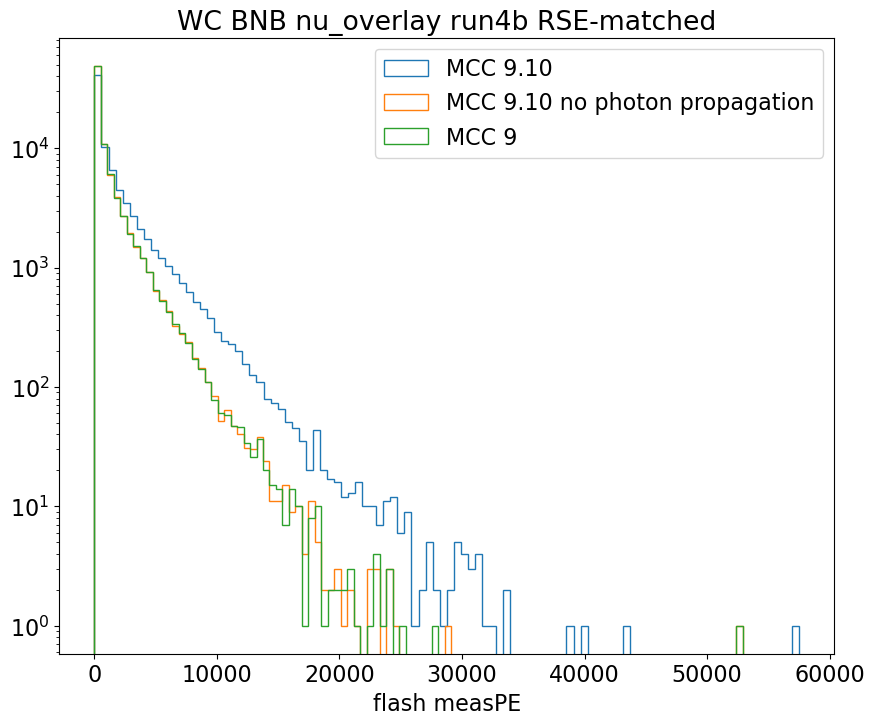

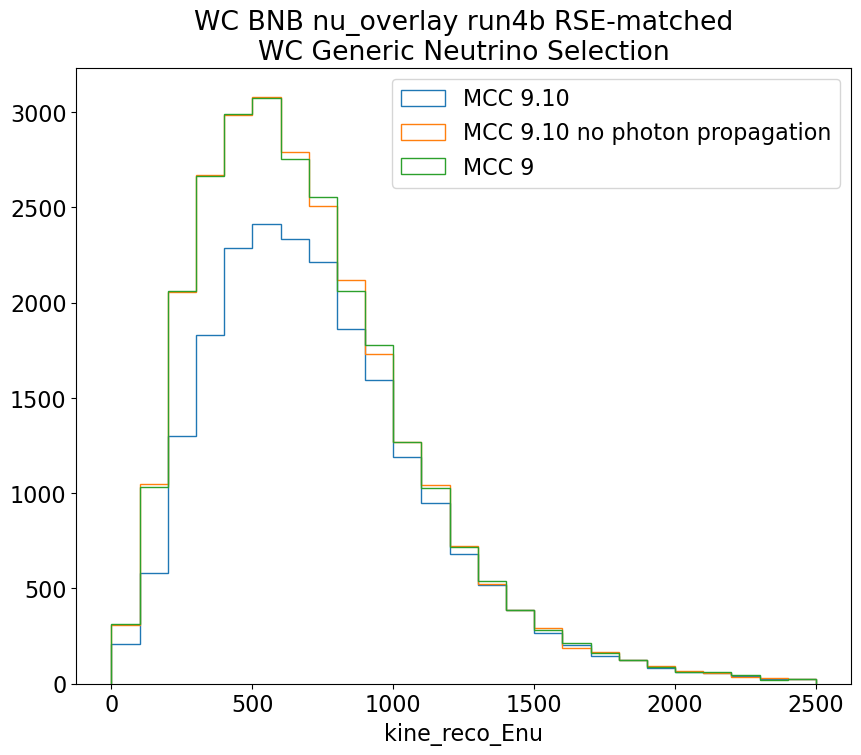

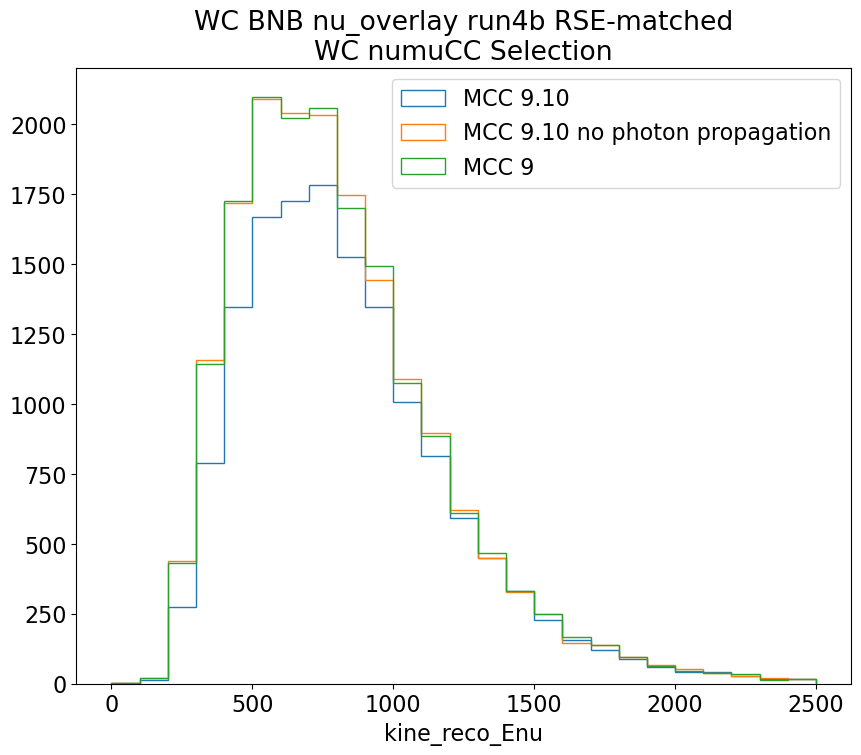

In [6]:
plt.rcParams.update({'font.size': 16})


plt.figure(figsize=(10, 8))

matched_mcc910_arr = rse_matched_df["flash_measPe" + "_mcc910"].to_numpy()
matched_mcc910_no_prop_arr = rse_matched_df["flash_measPe" + "_mcc910_no_prop"].to_numpy()
matched_mcc9_arr = rse_matched_df["flash_measPe_mcc9"].to_numpy()

plt.figure(figsize=(10, 8))
plt.hist(matched_mcc910_arr, histtype="step", bins=100, label="MCC 9.10")
plt.hist(matched_mcc910_no_prop_arr, histtype="step", bins=100, label="MCC 9.10 no photon propagation")
plt.hist(matched_mcc9_arr, histtype="step", bins=100, label="MCC 9")
plt.legend()
plt.xlabel("flash measPE")
plt.yscale("log")
plt.title("WC BNB nu_overlay run4b RSE-matched")
plt.legend()

bins = np.linspace(0, 2500, 26)

mcc910_gen_sel_kine_reco_Enus = rse_matched_df.query("kine_reco_Enu_mcc910 > 0")["kine_reco_Enu_mcc910"].to_numpy()
mcc910_no_prop_gen_sel_kine_reco_Enus = rse_matched_df.query("kine_reco_Enu_mcc910_no_prop > 0")["kine_reco_Enu_mcc910_no_prop"].to_numpy()
mcc9_gen_sel_kine_reco_Enus = rse_matched_df.query("kine_reco_Enu_mcc9 > 0")["kine_reco_Enu_mcc9"].to_numpy()

plt.figure(figsize=(10, 8))
plt.hist(mcc910_gen_sel_kine_reco_Enus, histtype="step", bins=bins, label="MCC 9.10")
plt.hist(mcc910_no_prop_gen_sel_kine_reco_Enus, histtype="step", bins=bins, label="MCC 9.10 no photon propagation")
plt.hist(mcc9_gen_sel_kine_reco_Enus, histtype="step", bins=bins, label="MCC 9")
plt.legend()
plt.xlabel("kine_reco_Enu")
plt.title("WC BNB nu_overlay run4b RSE-matched\nWC Generic Neutrino Selection")
plt.legend()

mcc910_numu_sel_kine_reco_Enus = rse_matched_df.query("numu_score_mcc910 > 0.9")["kine_reco_Enu_mcc910"].to_numpy()
mcc910_no_prop_numu_sel_kine_reco_Enus = rse_matched_df.query("numu_score_mcc910_no_prop > 0.9")["kine_reco_Enu_mcc910_no_prop"].to_numpy()
mcc9_numu_sel_kine_reco_Enus = rse_matched_df.query("numu_score_mcc9 > 0.9")["kine_reco_Enu_mcc9"].to_numpy()

plt.figure(figsize=(10, 8))
plt.hist(mcc910_numu_sel_kine_reco_Enus, histtype="step", bins=bins, label="MCC 9.10")
plt.hist(mcc910_no_prop_numu_sel_kine_reco_Enus, histtype="step", bins=bins, label="MCC 9.10 no photon propagation")
plt.hist(mcc9_numu_sel_kine_reco_Enus, histtype="step", bins=bins, label="MCC 9")
plt.legend()
plt.xlabel("kine_reco_Enu")
plt.title("WC BNB nu_overlay run4b RSE-matched\nWC numuCC Selection")
plt.legend()


In [7]:
print(1/0)

ZeroDivisionError: division by zero

In [ ]:

plt.figure(figsize=(10, 8))
plt.hist(matched_mcc910_arr - matched_mcc9_arr, histtype="step", bins=100)
plt.axvline(0, color="k", linestyle="--")
plt.xlabel("MCC 9.10 flash measPE - MCC 9 flash measPE")
plt.yscale("log")
plt.show()

ratio = np.nan_to_num(matched_mcc910_arr / matched_mcc9_arr)

plt.figure(figsize=(10, 8))
plt.hist(ratio, histtype="step", bins=np.linspace(0, 10, 100))
plt.axvline(1, color="k", linestyle="--")
plt.xlabel("MCC 9.10 flash measPE / MCC 9 flash measPE")
plt.yscale("log")
plt.show()


bins = np.linspace(-100, 100, 100)
plt.figure(figsize=(10, 8))
plt.hist(matched_mcc910_arr - matched_mcc9_arr, histtype="step", bins=bins)
plt.axvline(0, color="k", linestyle="--")
plt.xlabel("MCC 9.10 flash measPE - MCC 9 flash measPE")
plt.yscale("log")
plt.show()

plt.scatter(matched_mcc910_arr, matched_mcc9_arr, s=1)
plt.plot([0, 10000], [0, 10000], "k--")
plt.xlabel("MCC 9.10 flash measPE")
plt.ylabel("MCC 9 flash measPE")
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(matched_mcc910_arr, matched_mcc9_arr, s=1)
plt.plot([0, 10000], [0, 10000], "k--")
plt.xlabel("MCC 9.10 flash measPE")
plt.ylabel("MCC 9 flash measPE")
plt.xscale("log")
plt.yscale("log")
plt.show()

bins = [np.linspace(0, 10000, 100), np.linspace(0, 10000, 100)]
plt.figure(figsize=(10, 8))
plt.hist2d(matched_mcc910_arr, matched_mcc9_arr, bins=bins, cmap="jet")
plt.colorbar()
plt.plot([0, 10000], [0, 10000], "k--")
plt.xlabel("MCC 9.10 flash measPE")
plt.ylabel("MCC 9 flash measPE")
plt.show()

bins = [np.logspace(np.log10(1), np.log10(10000), 100), np.logspace(np.log10(1), np.log10(10000), 100)]
plt.figure(figsize=(10, 8))
plt.hist2d(matched_mcc910_arr, matched_mcc9_arr, bins=bins, cmap="jet")
plt.colorbar()
plt.plot([0, 10000], [0, 10000], "k--")
plt.xlabel("MCC 9.10 flash measPE")
plt.ylabel("MCC 9 flash measPE")
plt.xscale("log")
plt.yscale("log")
plt.show()



In [7]:
print(1/0)

ZeroDivisionError: division by zero

plotting flash_found


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


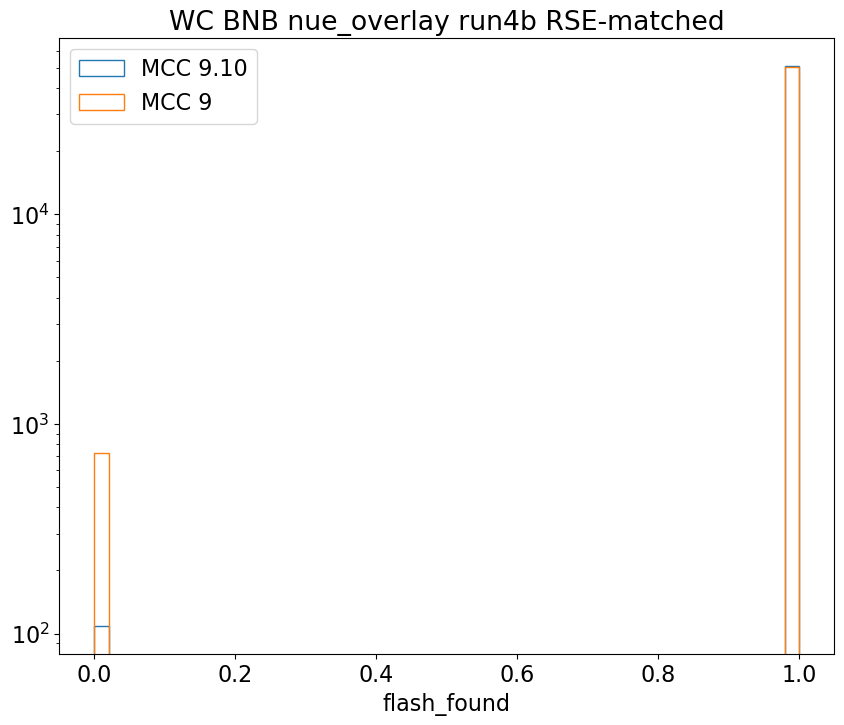

plotting flash_time


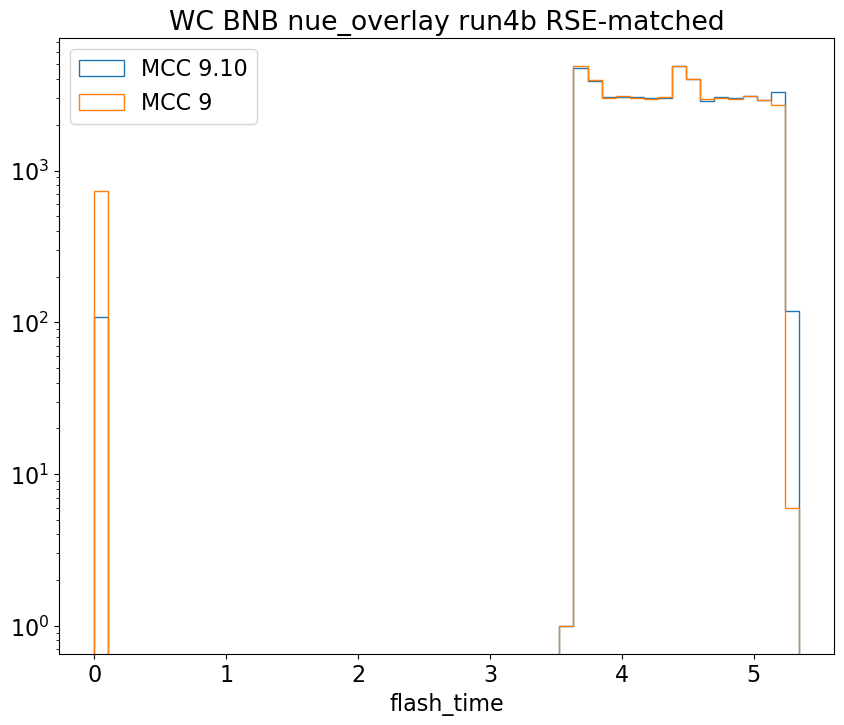

plotting flash_found_asInt


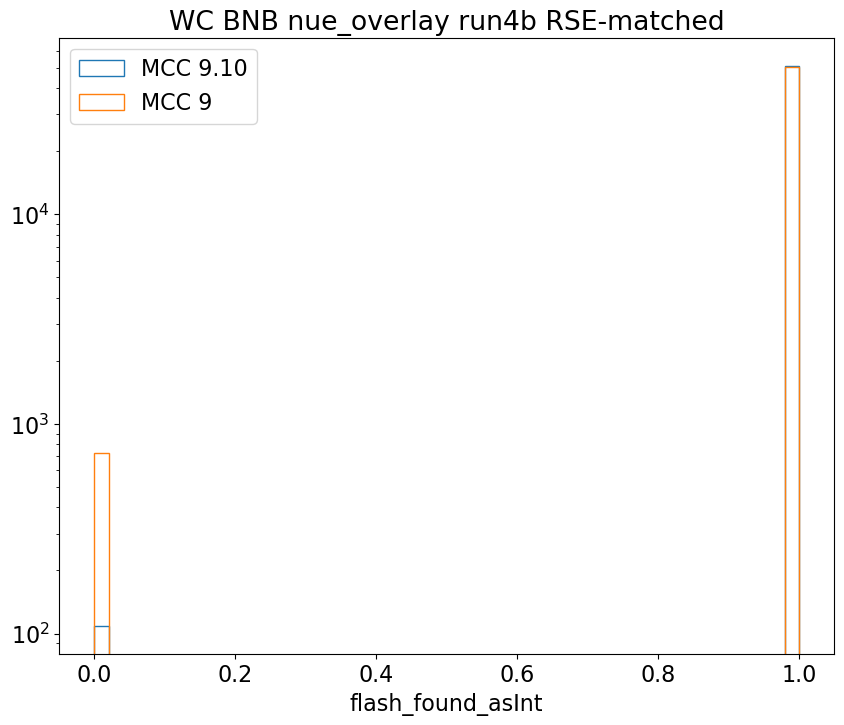

plotting match_found_asInt


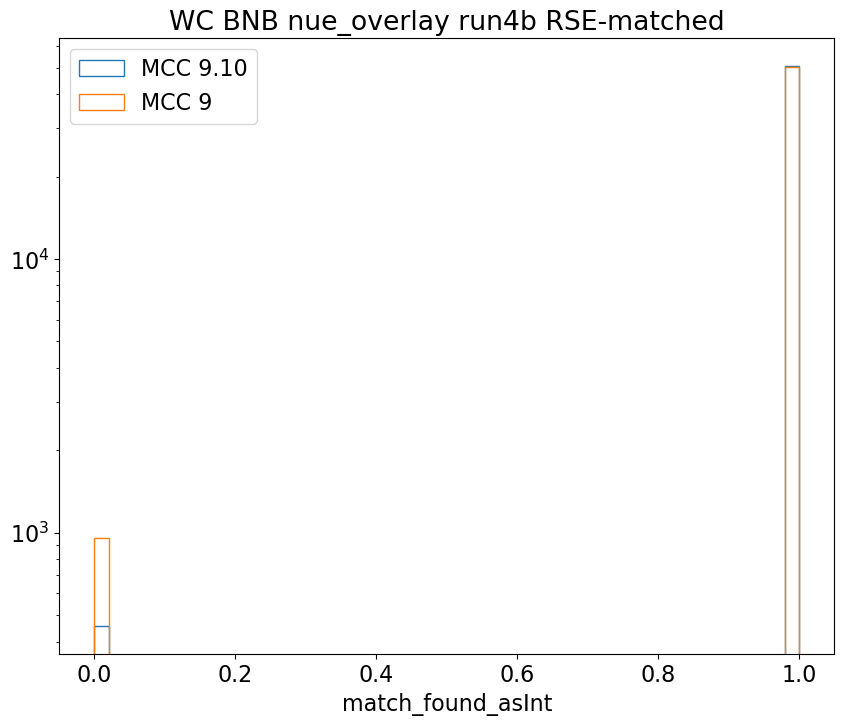

plotting flash_measPe


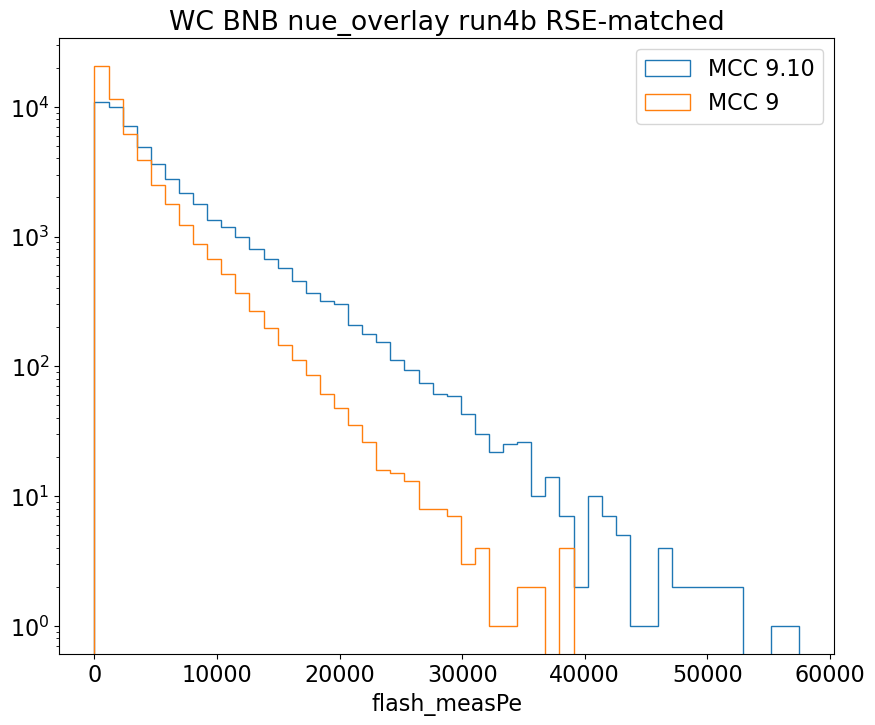

plotting flash_predPe


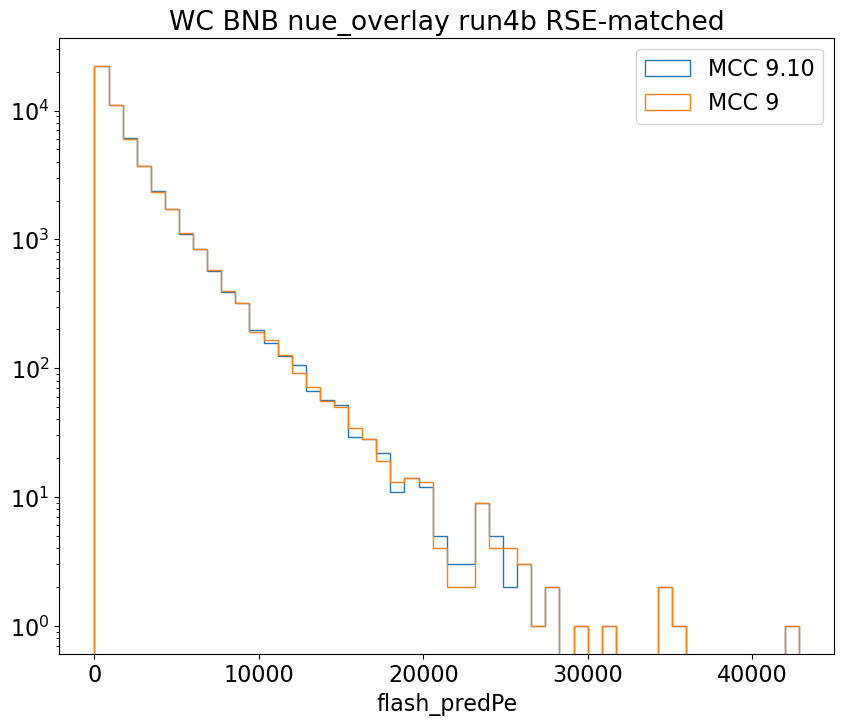

plotting match_found


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


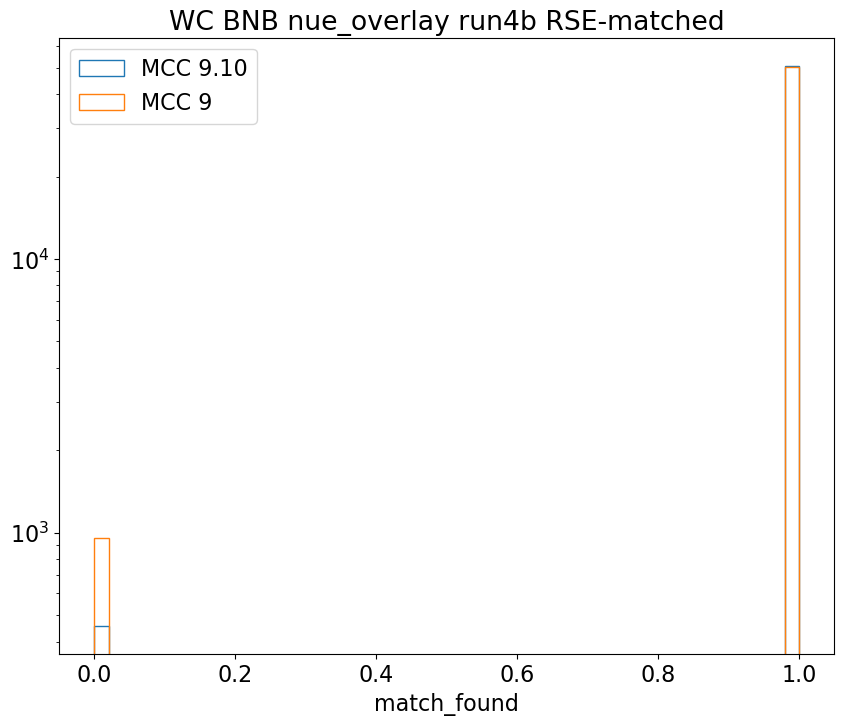

plotting match_type


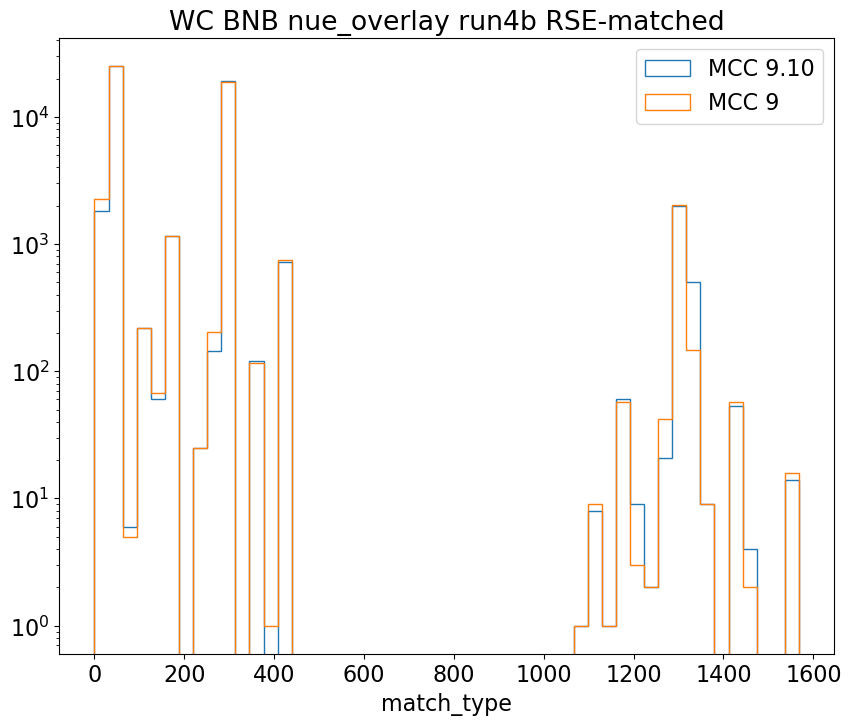

plotting match_isFC


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


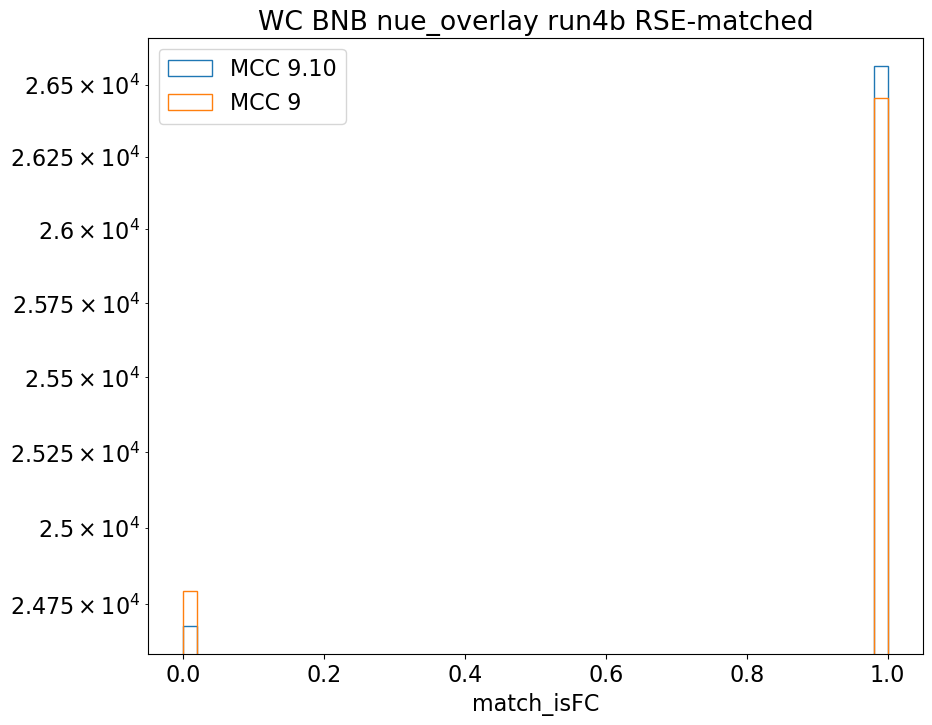

plotting match_isTgm


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


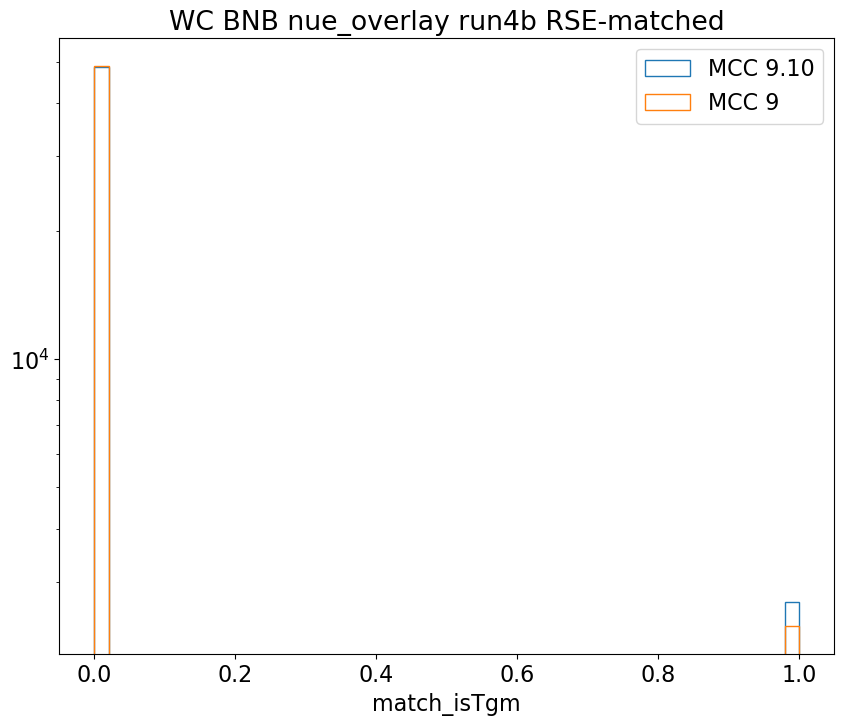

plotting match_notFC_FV


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


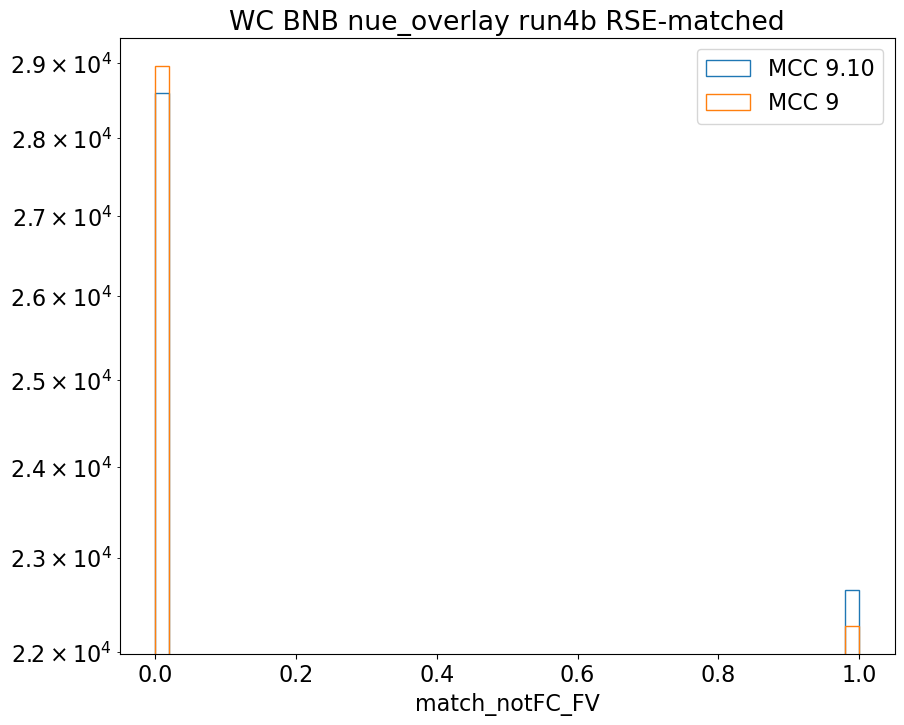

plotting match_notFC_SP


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


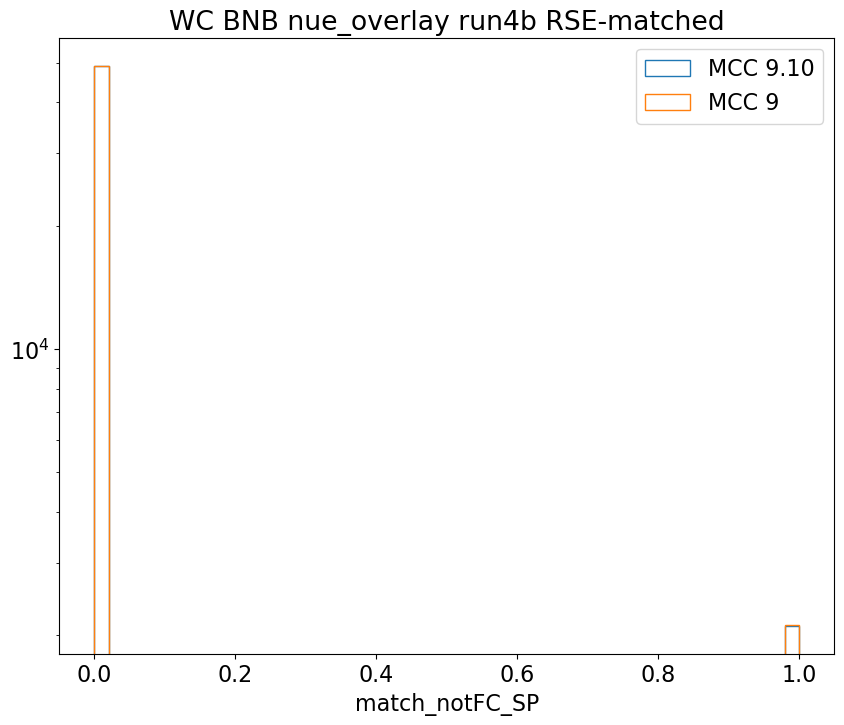

plotting match_notFC_DC


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


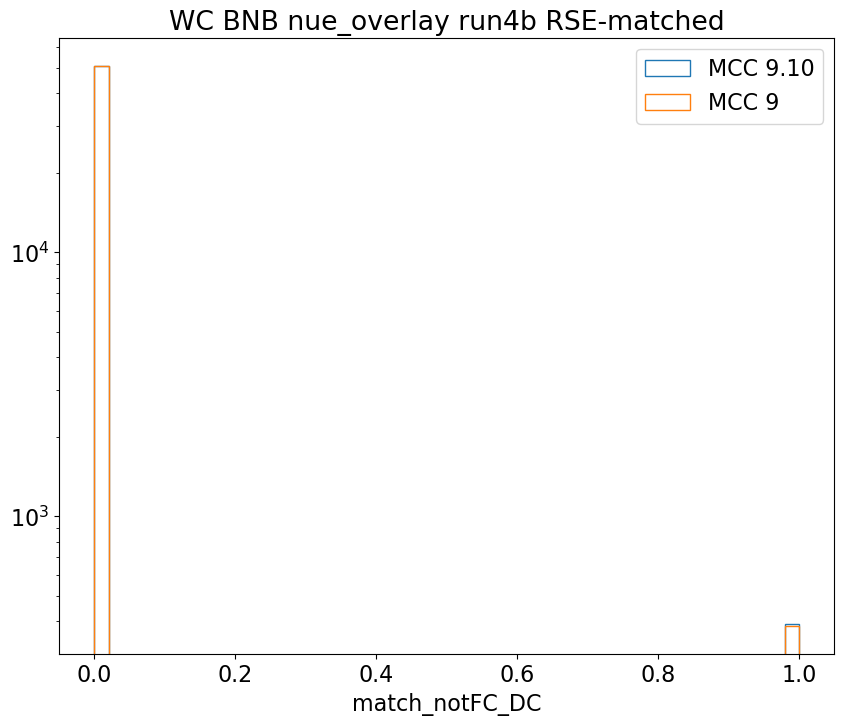

plotting match_chargeU


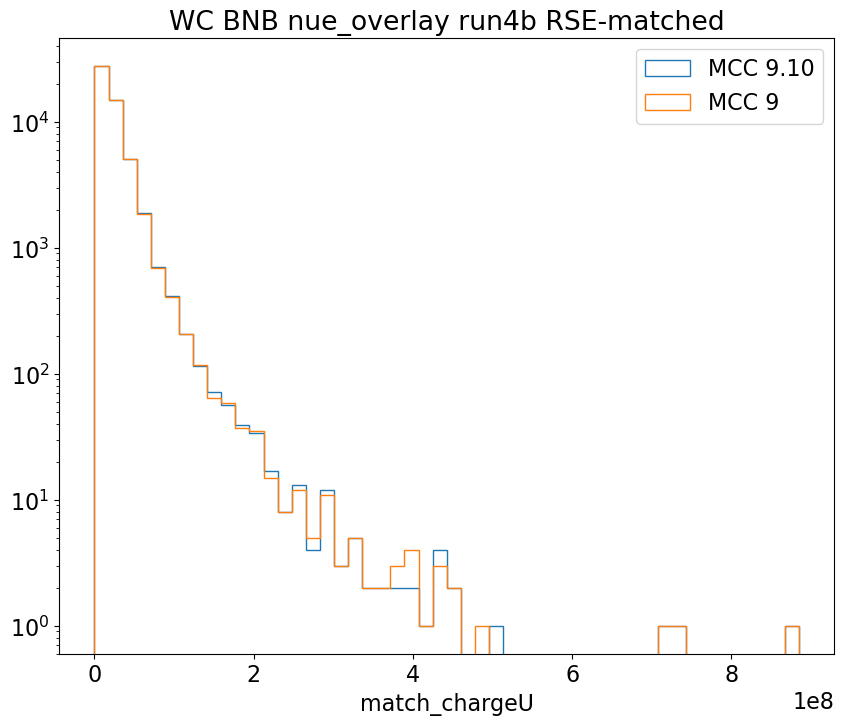

plotting match_chargeV


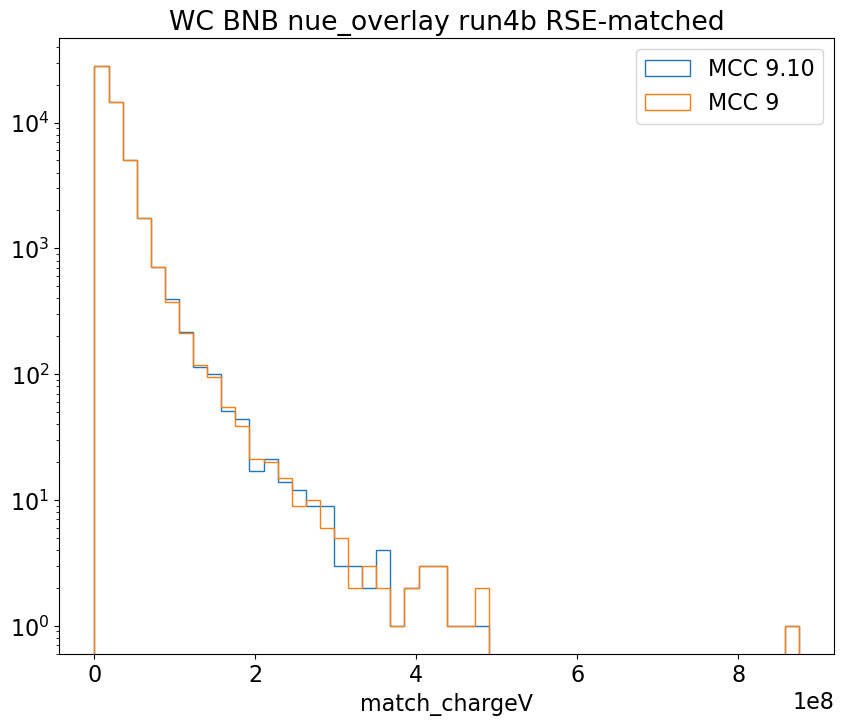

plotting match_chargeY


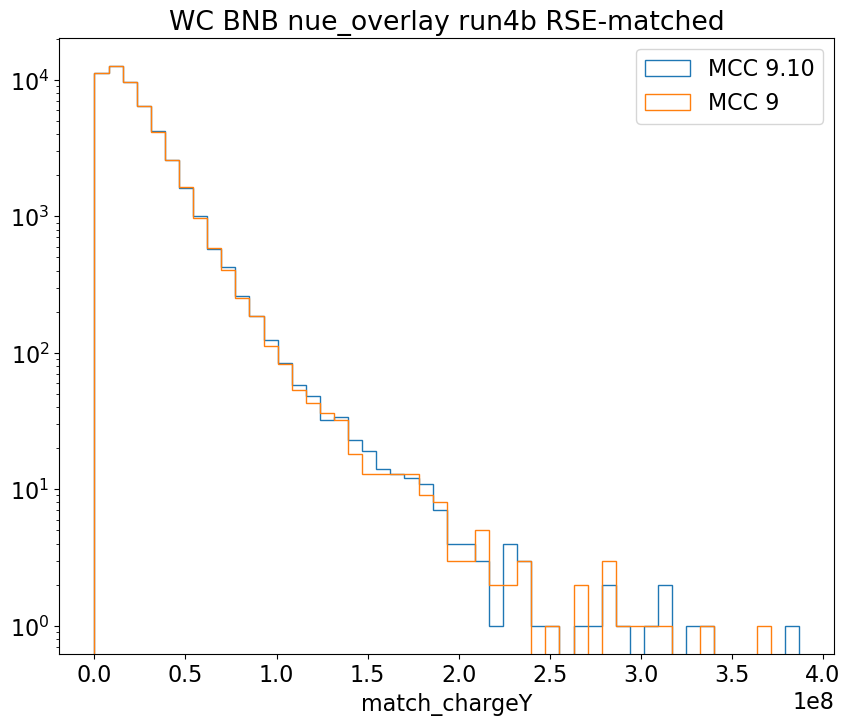

plotting match_energyY


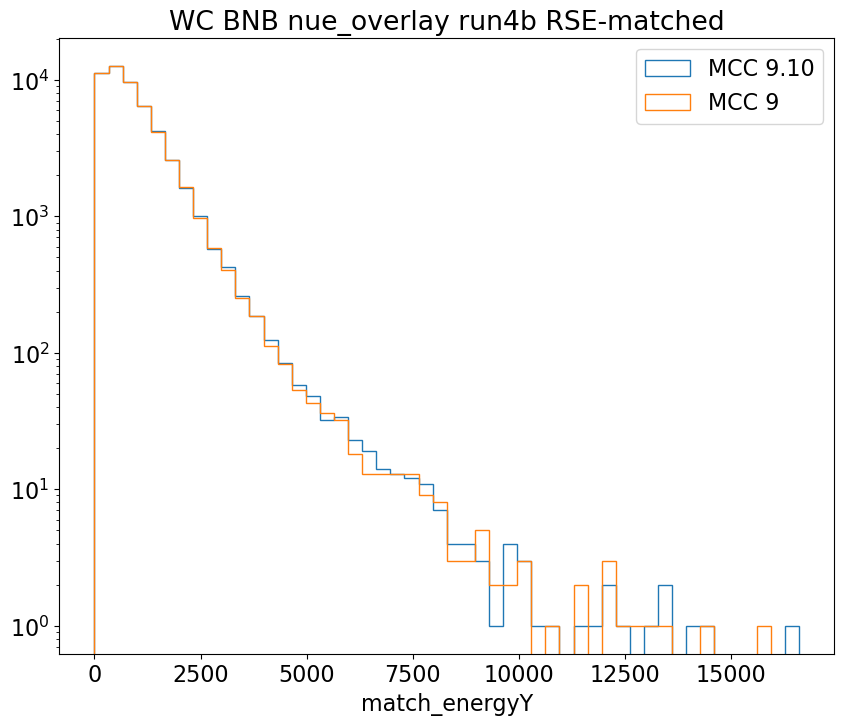

plotting light_mismatch


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


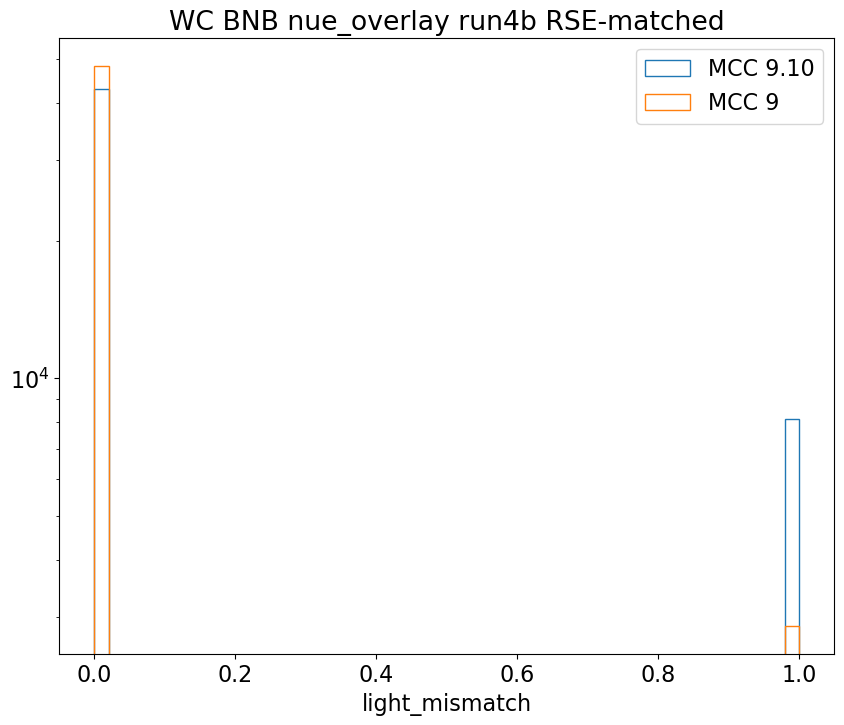

plotting match_charge


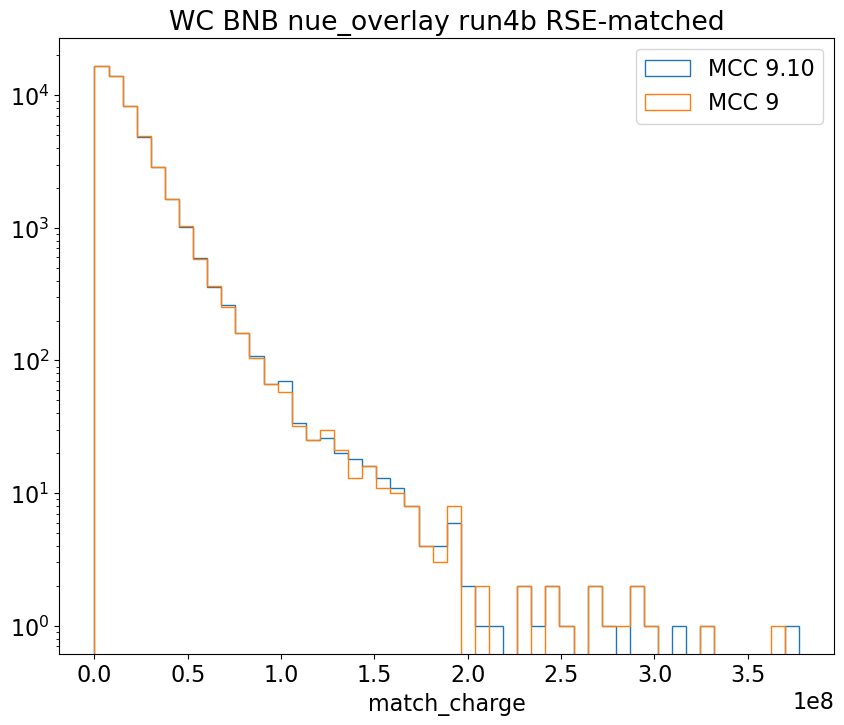

plotting match_energy


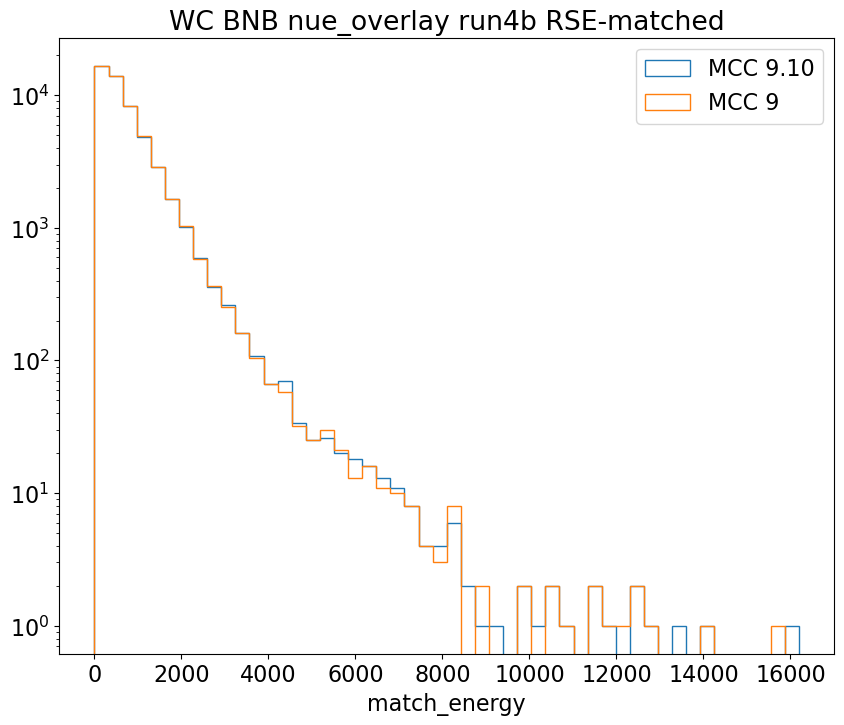

plotting stm_eventtype


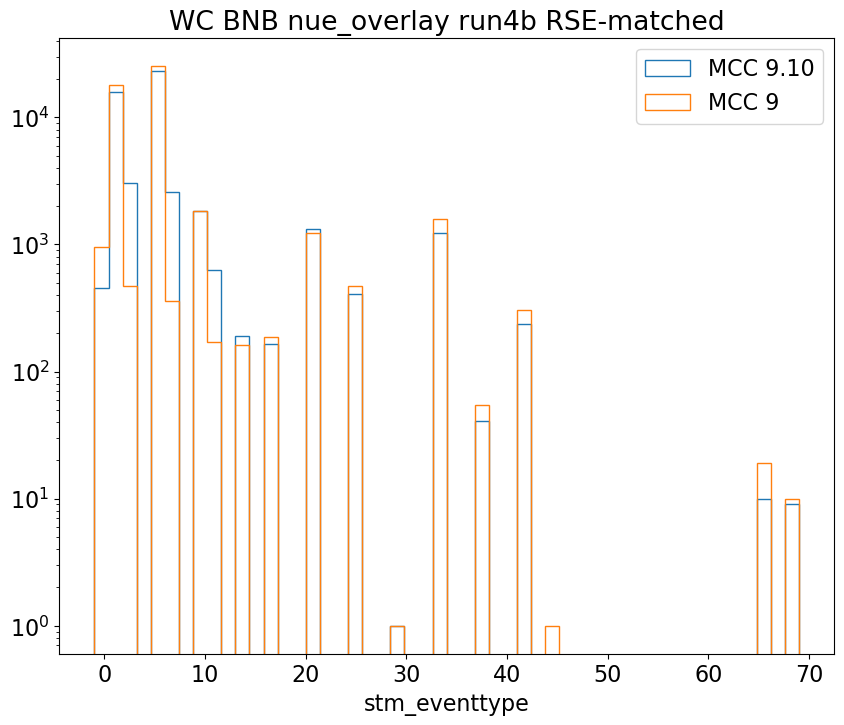

plotting stm_lowenergy


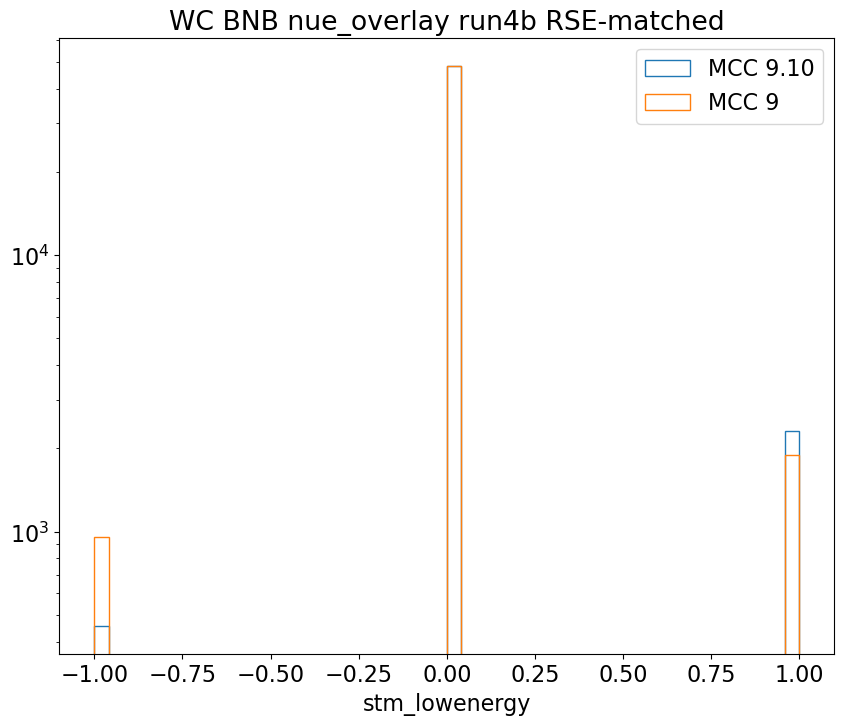

plotting stm_LM


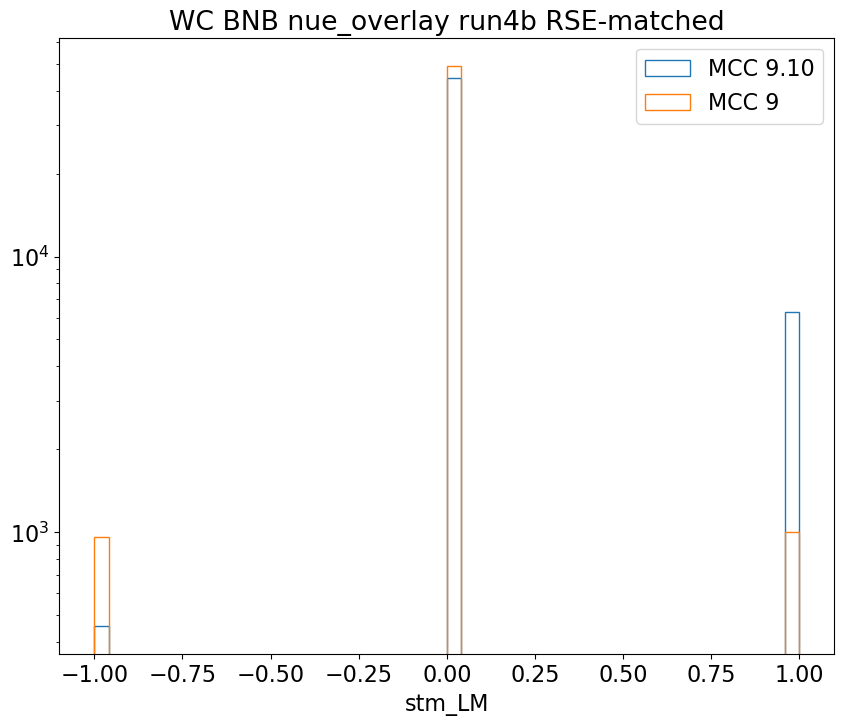

plotting stm_TGM


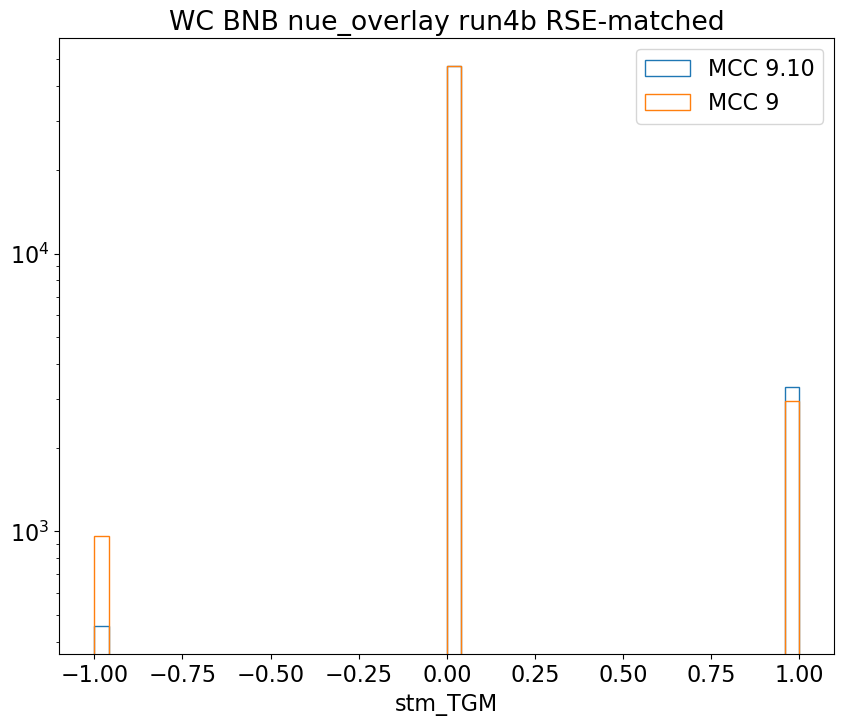

plotting stm_STM


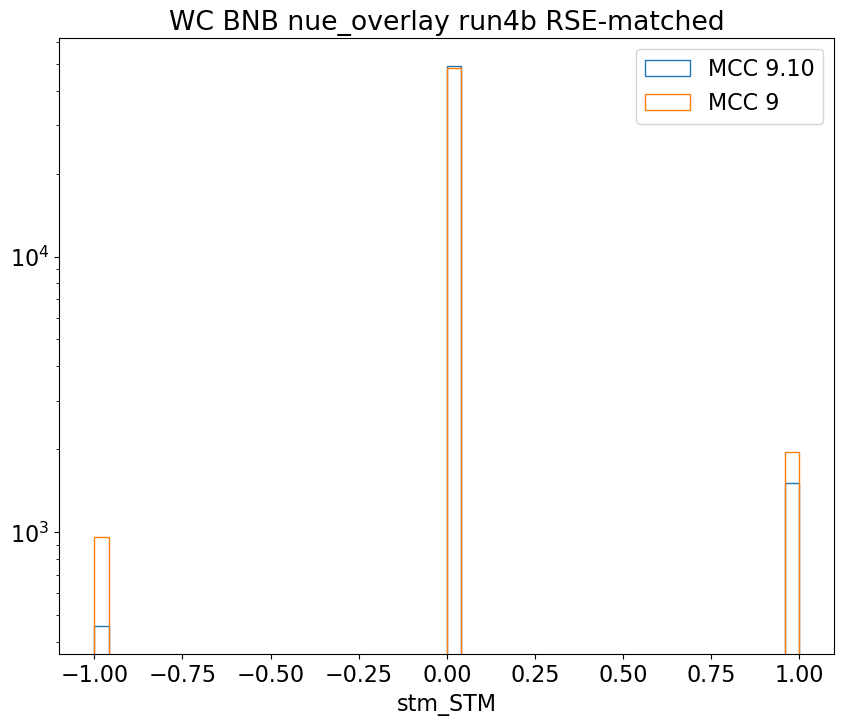

plotting stm_FullDead


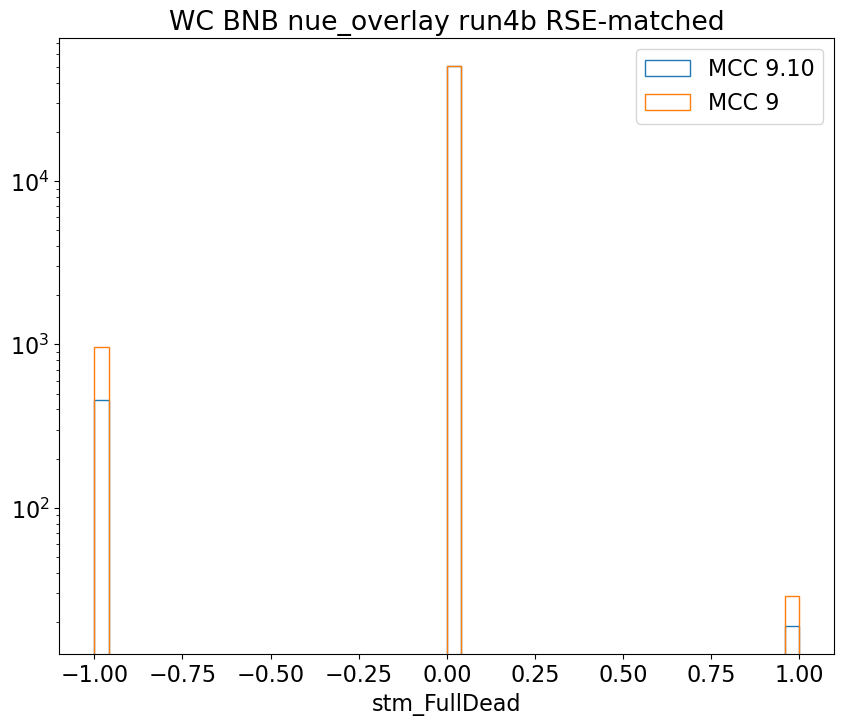

plotting stm_clusterlength


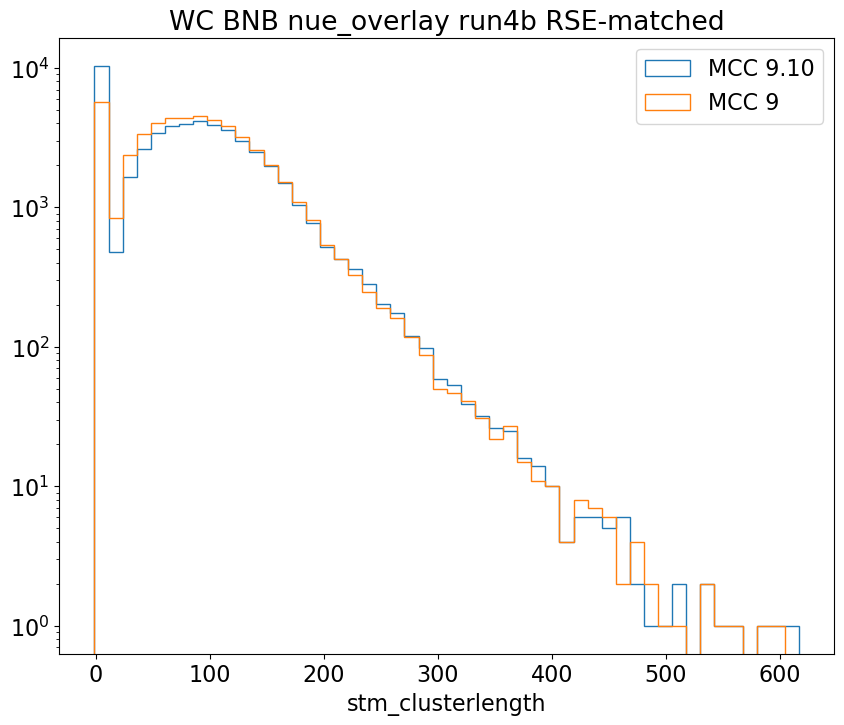

plotting truth_nuEnergy


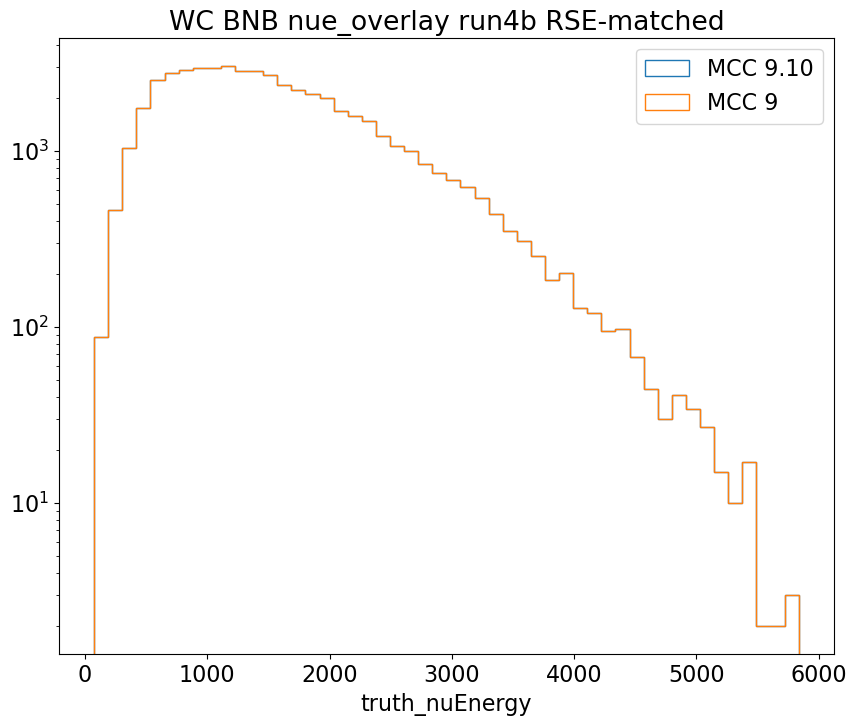

plotting truth_energyInside


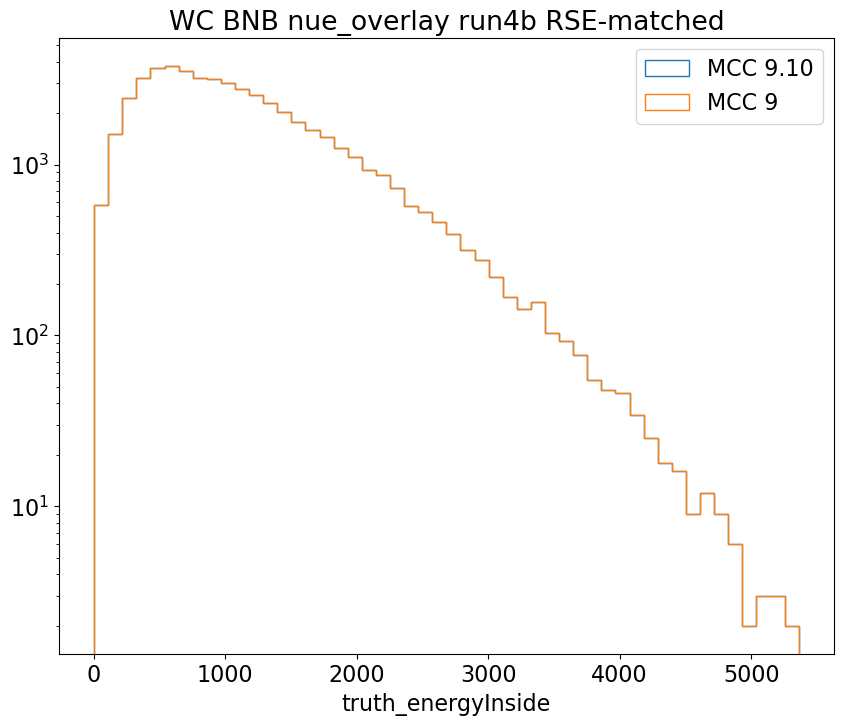

plotting truth_electronInside


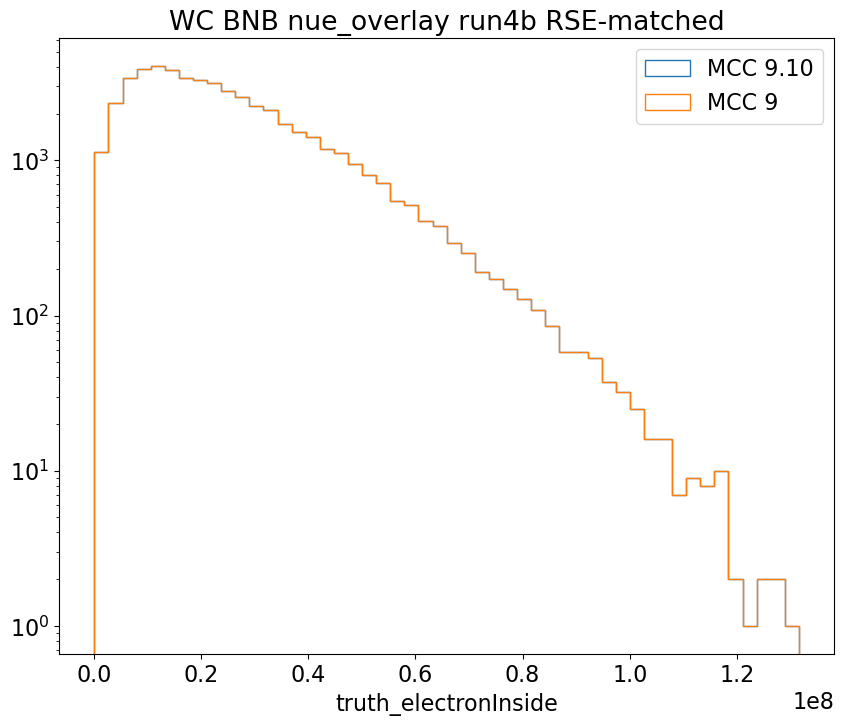

plotting truth_nuPdg


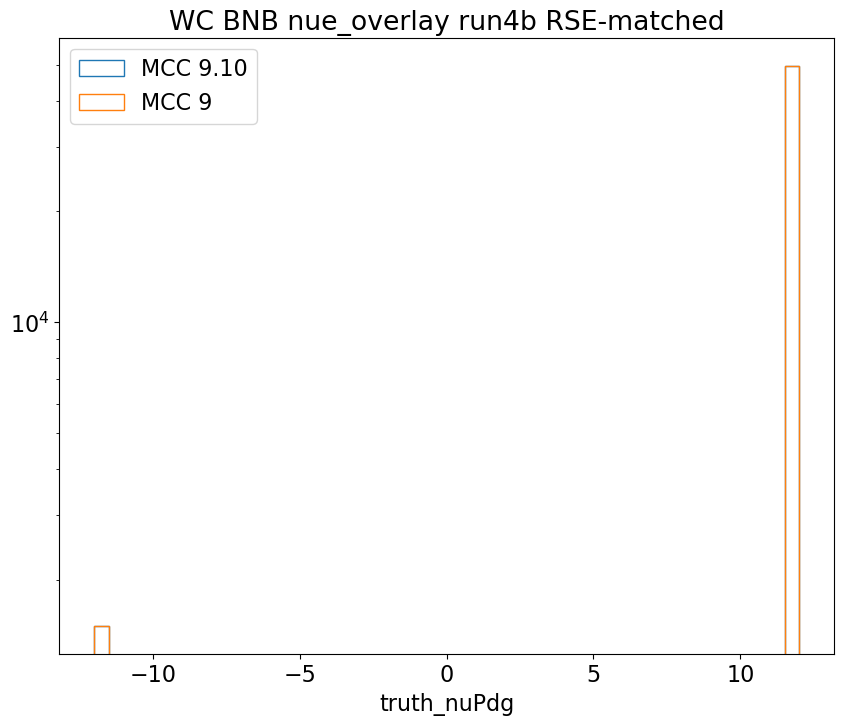

plotting truth_isCC


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


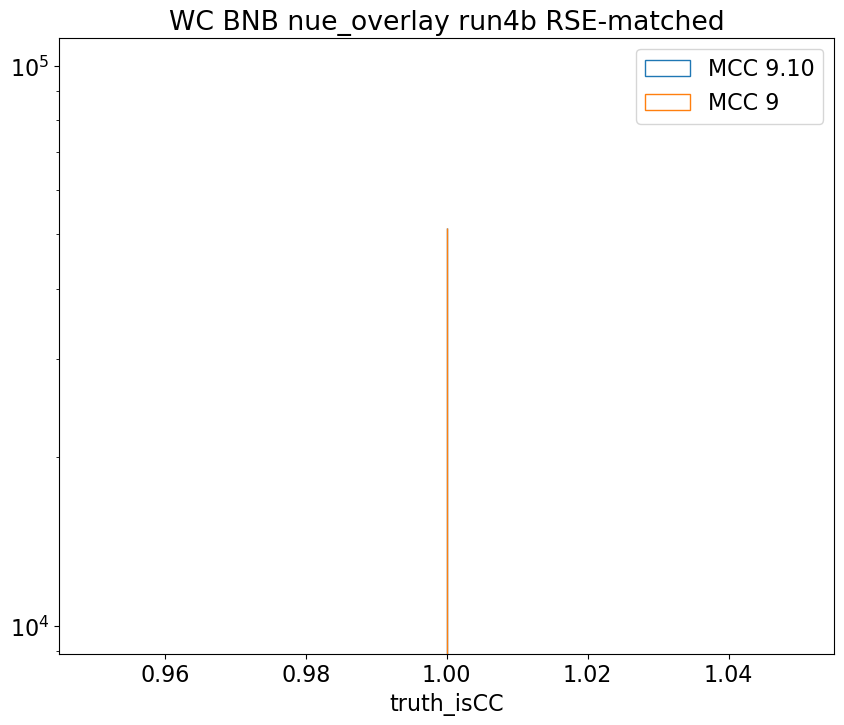

plotting truth_isEligible


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


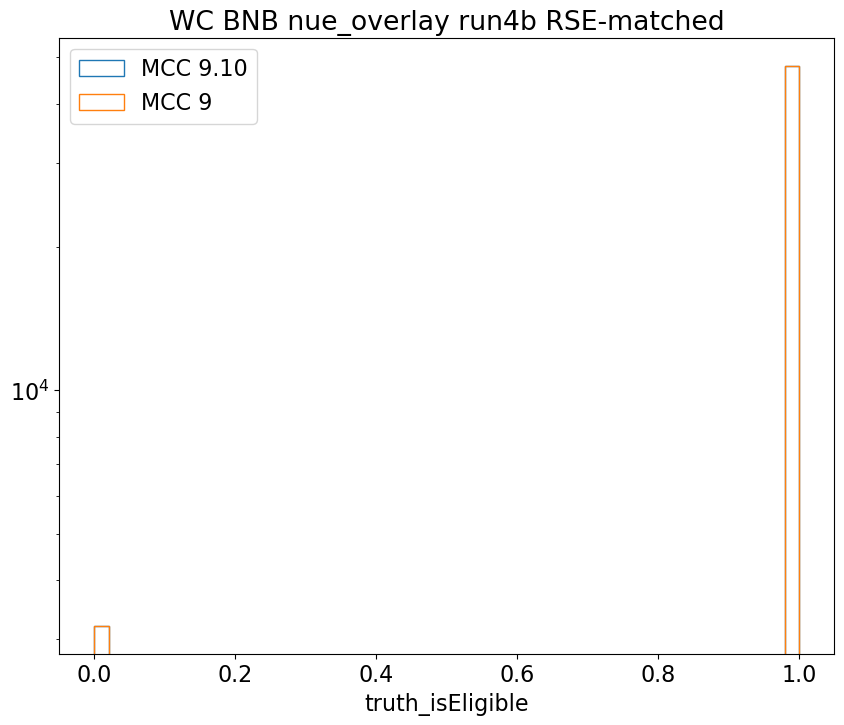

plotting truth_NCisEligible


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


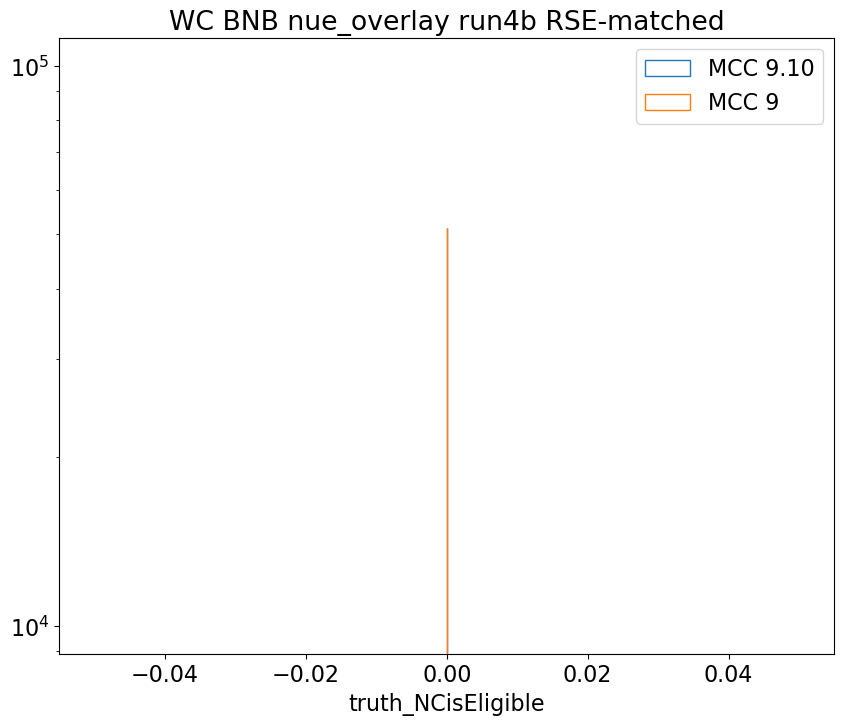

plotting truth_isFC


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


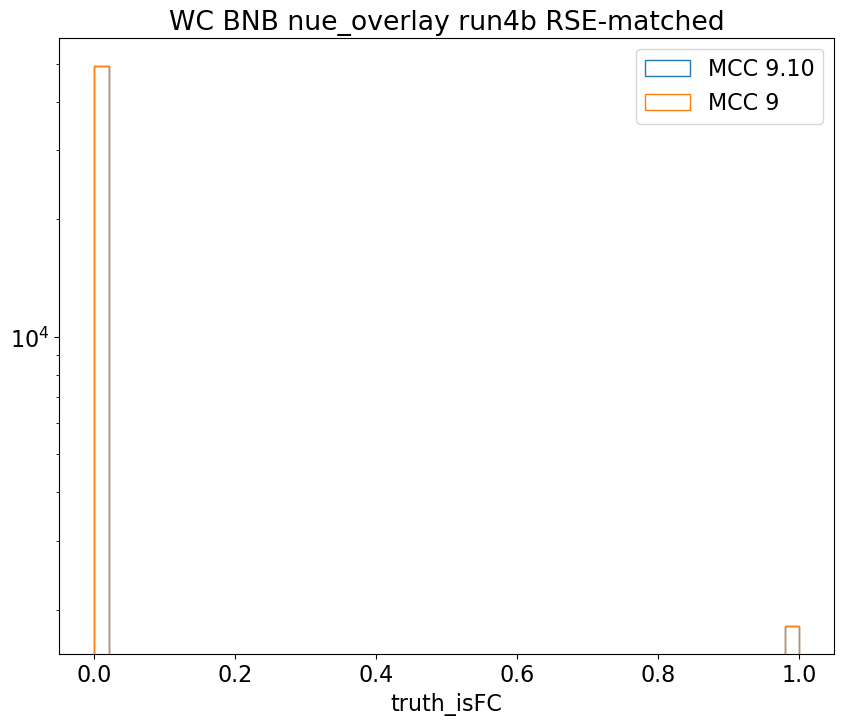

plotting truth_vtxInside


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


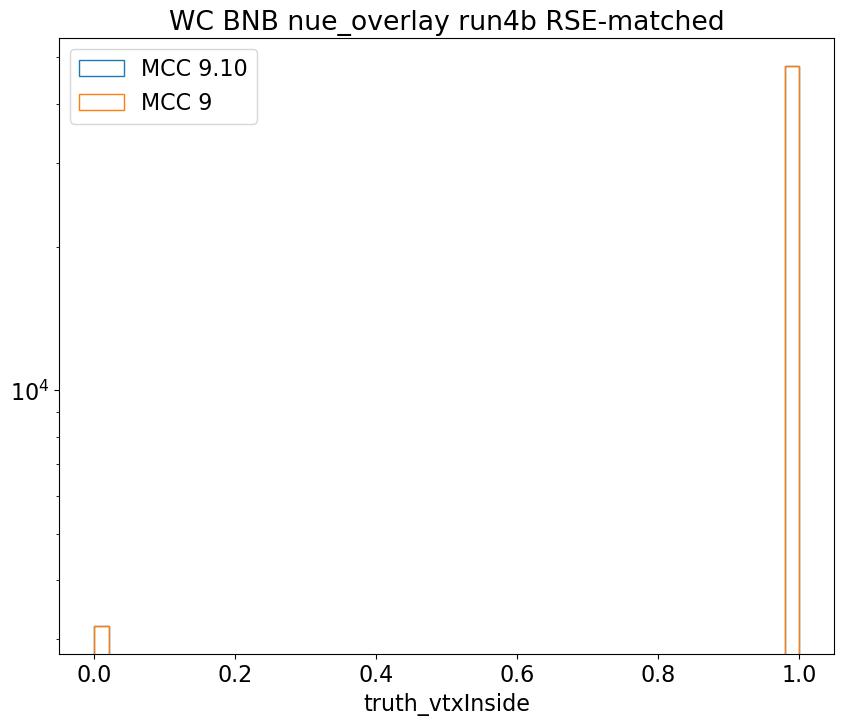

plotting truth_vtxX


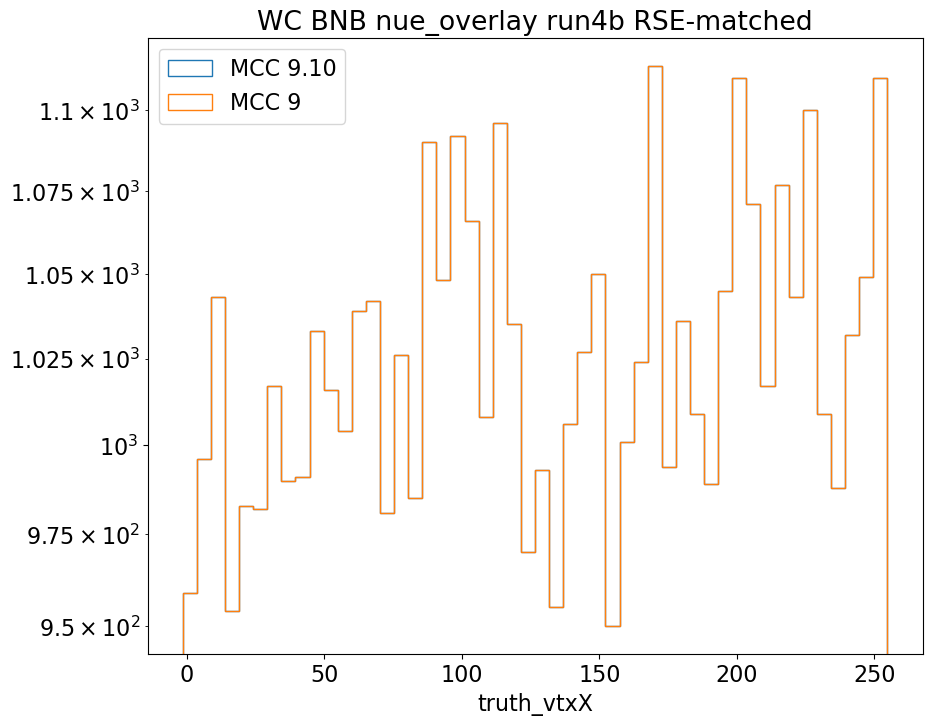

plotting truth_vtxY


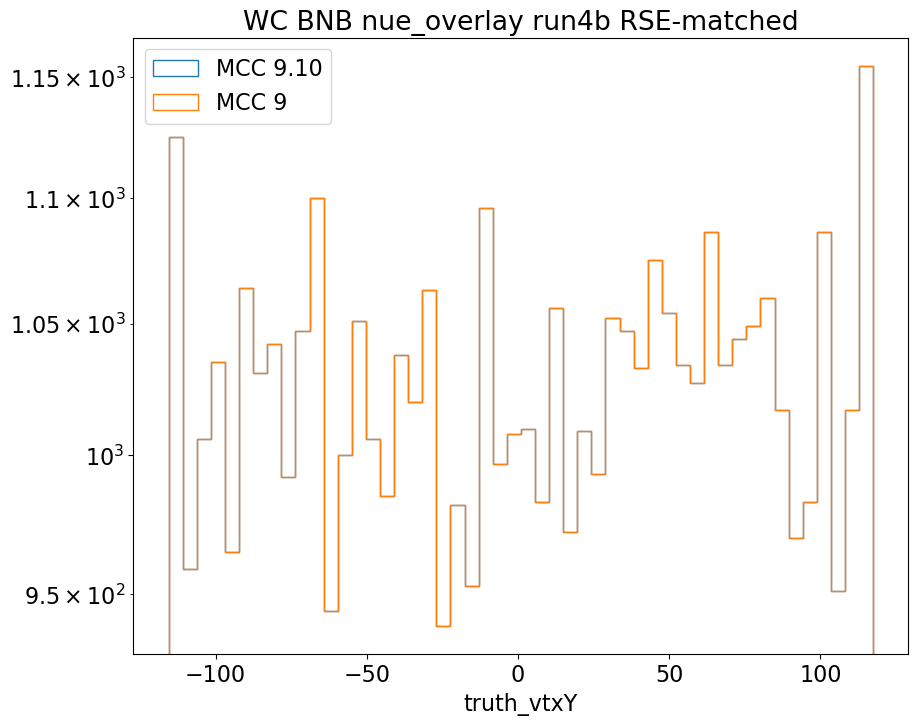

plotting truth_vtxZ


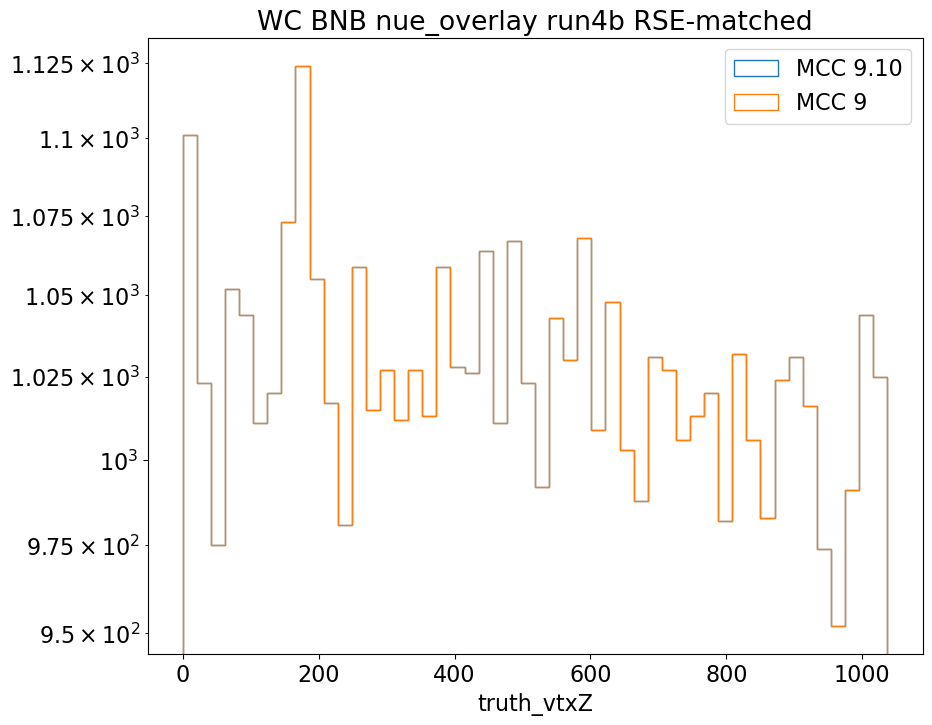

plotting truth_nuTime


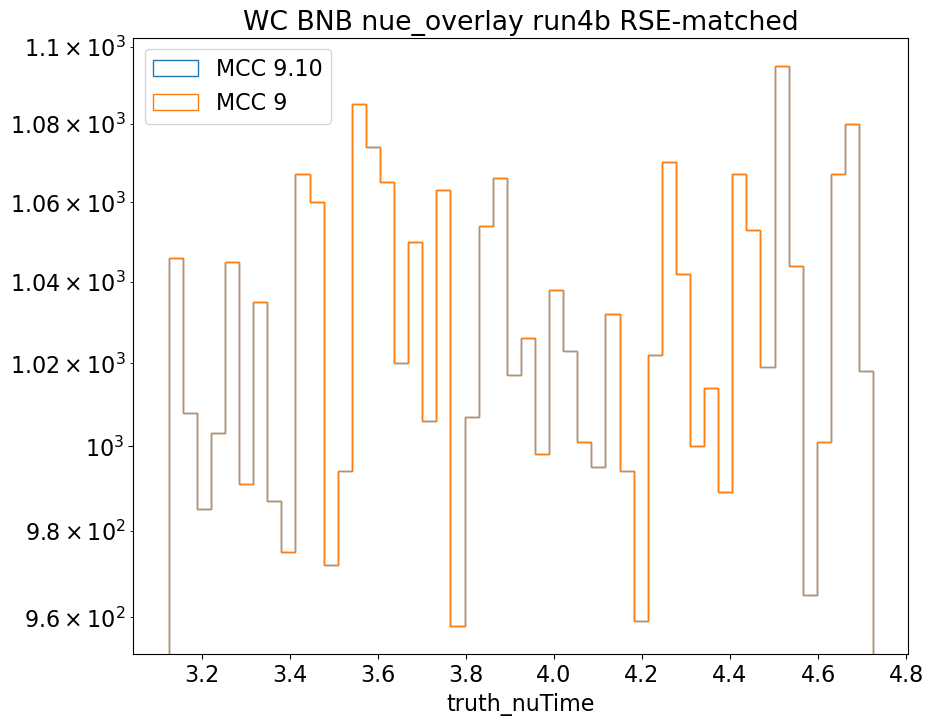

plotting match_completeness


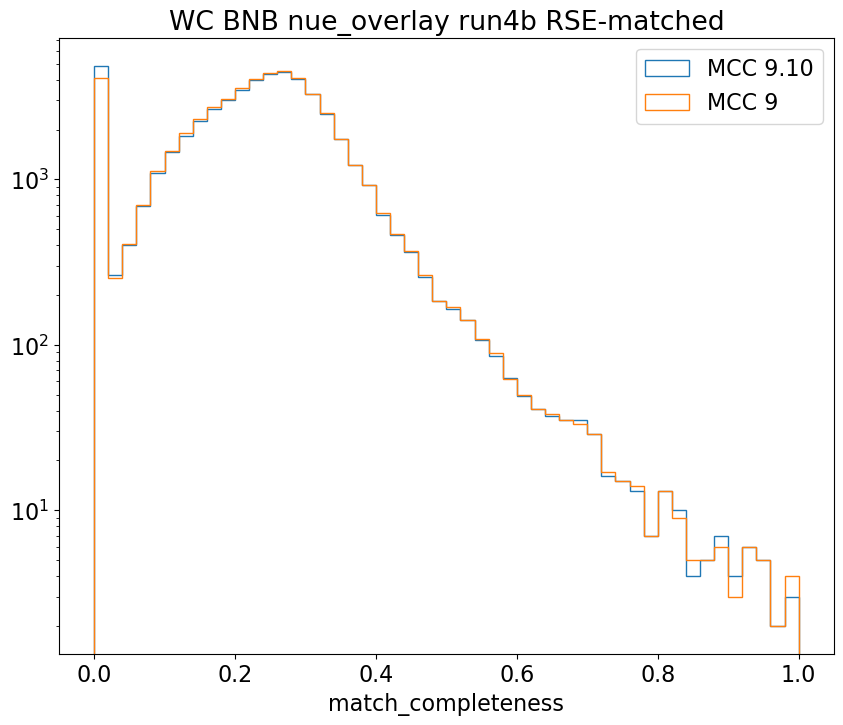

plotting match_completeness_energy


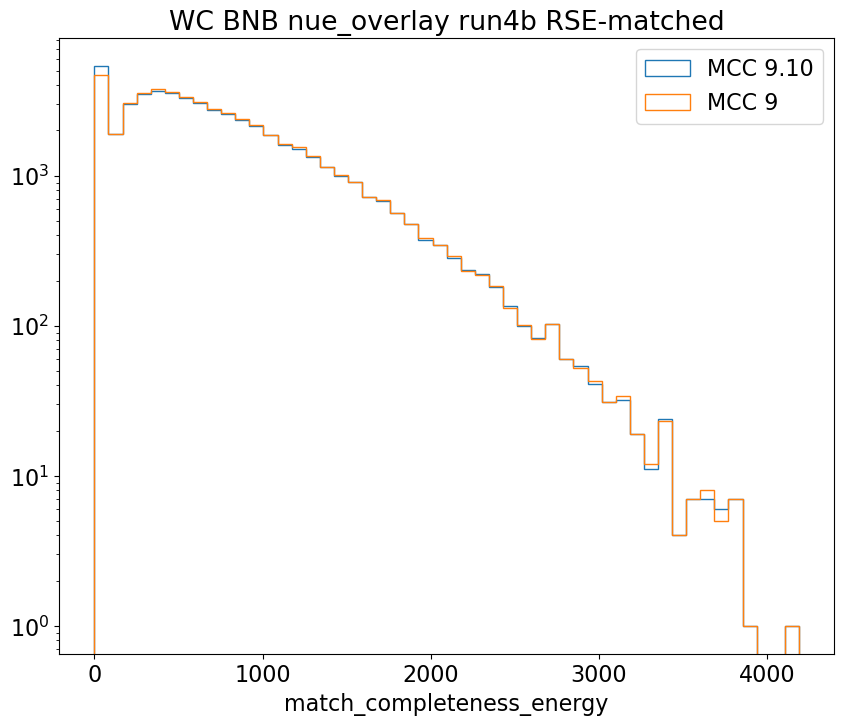

plotting match_purity


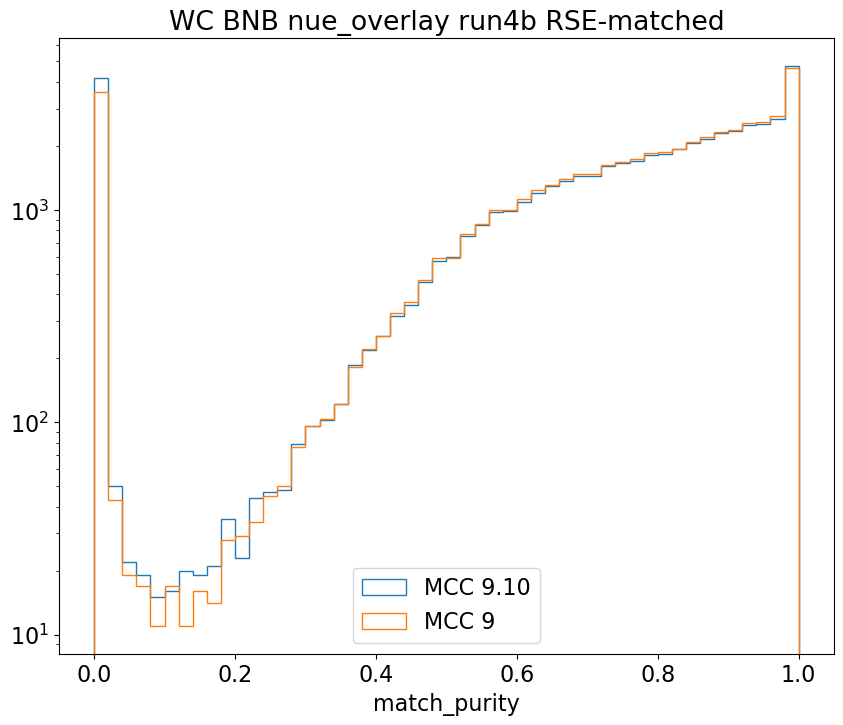

plotting match_purity_xz


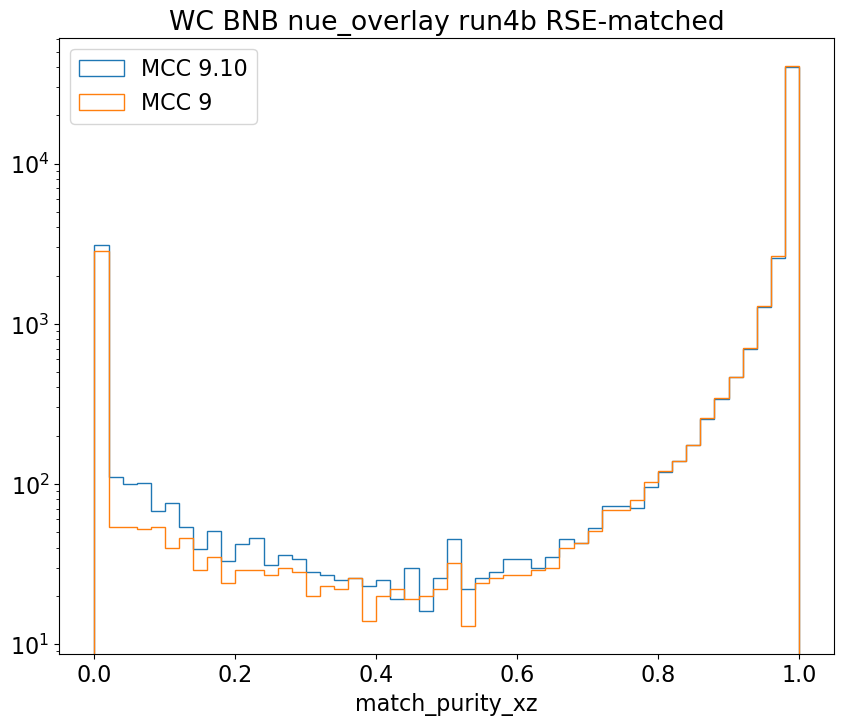

plotting match_purity_xy


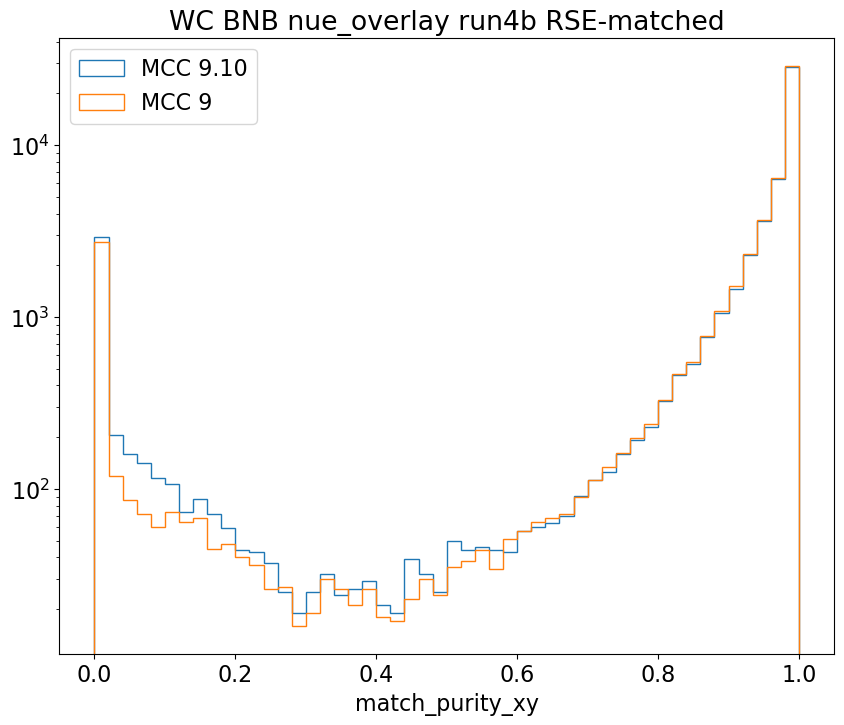

plotting weight_spline


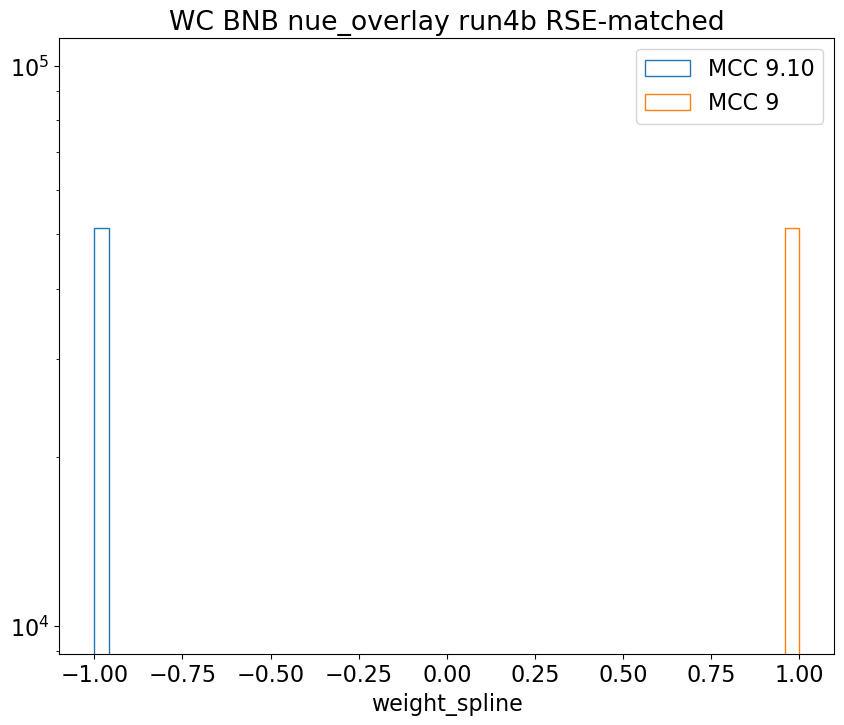

plotting weight_cv


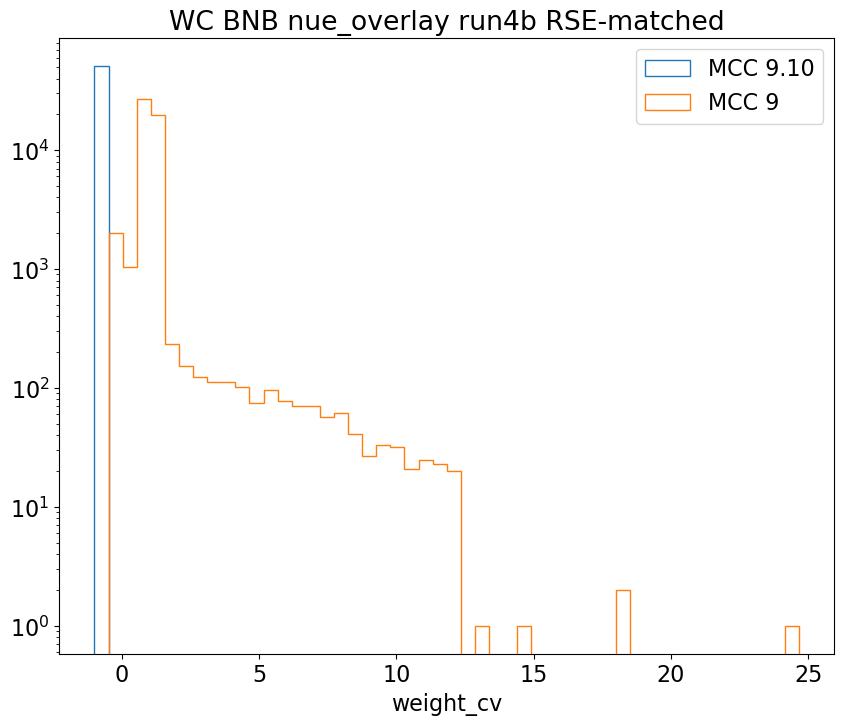

plotting weight_lee


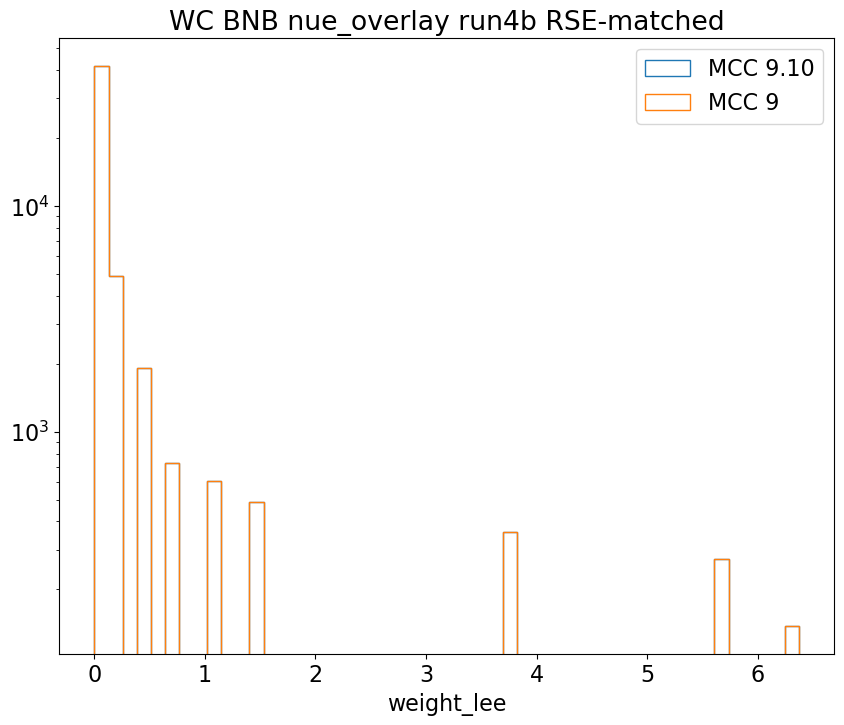

plotting weight_change


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


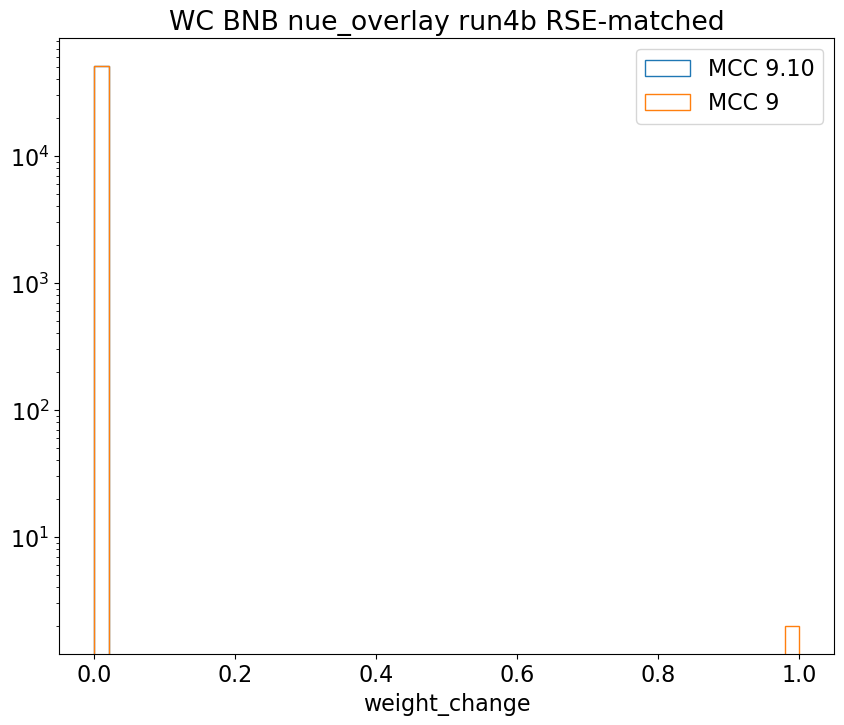

In [7]:
bins = np.linspace(-5, 3000, 100)

for var in T_eval_vars:

    if var in ["run", "subrun", "event", "file_type"]: continue

    print("plotting", var)

    mcc9_vars = rse_matched_df[var + "_mcc9"]
    mcc910_vars = rse_matched_df[var + "_mcc910"]

    min_var = min(np.min(mcc9_vars), np.min(mcc910_vars))
    max_var = max(np.max(mcc9_vars), np.max(mcc910_vars))

    bins = np.linspace(min_var, max_var, 51)

    plt.rcParams.update({'font.size': 16})

    plt.figure(figsize=(10, 8))
    plt.hist(mcc910_vars, bins=bins, histtype="step", label="MCC 9.10")
    plt.hist(mcc9_vars, bins=bins, histtype="step", label="MCC 9")
    plt.legend()
    plt.xlabel(var)
    plt.yscale("log")
    plt.title("WC BNB nue_overlay run4b RSE-matched")
    plt.show()

